<a href="https://colab.research.google.com/github/brodyanderson/math-6880-Project3/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \
Project 3

# 1. Fashion-MNIST image classification using sklearn

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(len(X_train), -1)
X_test  = X_test.reshape(len(X_test), -1)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# your code here

Iterations to Converge: 96
Final Loss: 0.0139
Training Time: 253.25 seconds
Training Accuracy: 0.996467
Test Accuracy: 0.876900

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.98      0.97      0.98      1000
           2       0.74      0.82      0.78      1000
           3       0.90      0.85      0.88      1000
           4       0.79      0.80      0.79      1000
           5       0.97      0.96      0.96      1000
           6       0.72      0.65      0.68      1000
           7       0.94      0.96      0.95      1000
           8       0.96      0.97      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Confusion Matrix:
[[832   2  21  18   7   2 111   0   7   0]
 [  6 973   5   9   2   0  

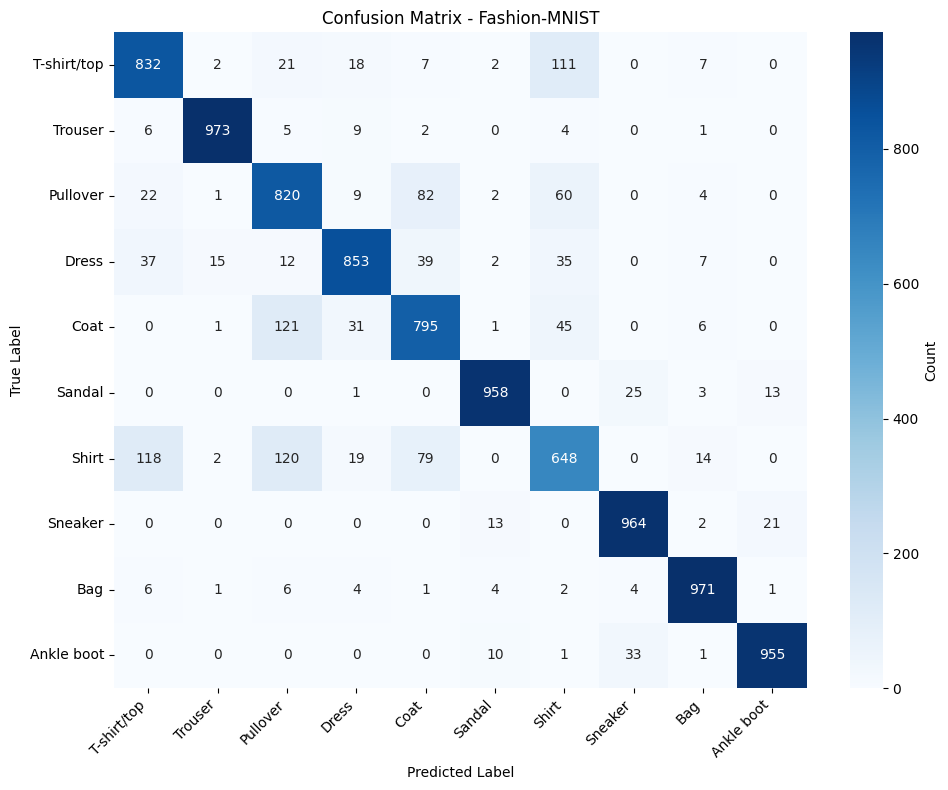

In [ ]:
# Simple Model
import time
import matplotlib.pyplot as plt
import seaborn as sns

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=1)

start_time = time.time()
mlp.fit(X_train, y_train)
training_time = time.time() - start_time

y_pred = mlp.predict(X_test)

print(f"Iterations to Converge: {mlp.n_iter_}")
print(f"Final Loss: {mlp.loss_curve_[-1]:.4f}")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Training Accuracy: {accuracy_score(y_train, mlp.predict(X_train)):4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):4f}")
print()

print("Classification Report:")
print(classification_report(y_test, y_pred))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fashion-MNIST')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Sample
import numpy as np
import random

np.random.seed(1)
random.seed(1)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("Class counts:")
for i in range(len(classes)):
  print(f"{classes[i]}: {np.sum(y_train == i)}")

X_train_sample = []
y_train_sample = []

for i in range(len(classes)):
    class_mask = y_train == i
    class_indices = np.where(class_mask)[0]
    random_sample = np.random.choice(class_indices, 1000, replace=False)

    X_train_sample.extend(X_train[random_sample])
    y_train_sample.extend(y_train[random_sample])

X_train_sample = np.array(X_train_sample)
y_train_sample = np.array(y_train_sample)

print()
print("Sample class counts:")
for i in range(len(classes)):
  print(f"{classes[i]}: {np.sum(y_train_sample == i)}")

print()
print("Sampled data shape:", X_train_sample.shape)
print("Sampled labels shape:", y_train_sample.shape)

Class counts:
T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000

Sample class counts:
T-shirt/top: 1000
Trouser: 1000
Pullover: 1000
Dress: 1000
Coat: 1000
Sandal: 1000
Shirt: 1000
Sneaker: 1000
Bag: 1000
Ankle boot: 1000

Sampled data shape: (10000, 784)
Sampled labels shape: (10000,)


Iterations to Converge: 90
Final Loss: 0.0031
Training Time: 31.92 seconds
Training Accuracy: 0.886483
Test Accuracy: 0.855000

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1000
           1       0.97      0.95      0.96      1000
           2       0.76      0.79      0.77      1000
           3       0.86      0.85      0.86      1000
           4       0.78      0.76      0.77      1000
           5       0.94      0.92      0.93      1000
           6       0.66      0.65      0.65      1000
           7       0.91      0.93      0.92      1000
           8       0.95      0.94      0.95      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.85      0.85     10000


Confusion Matrix:
[[818   1  18  28   3   1 122   0   8   1]
 [  5 954   5  22   8   0   

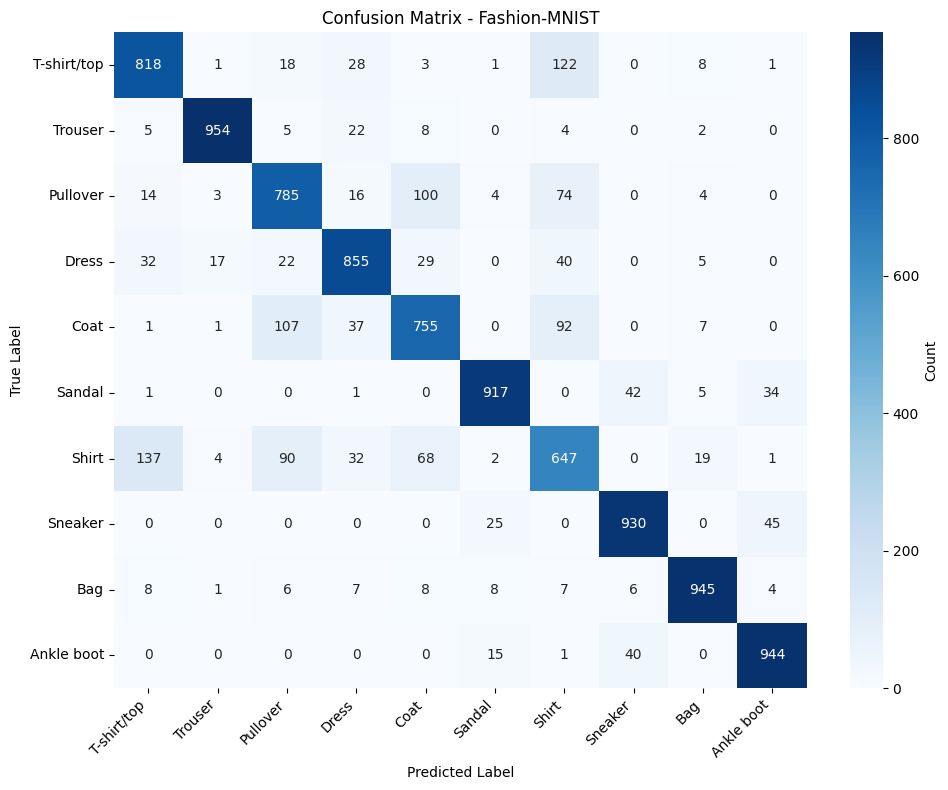

In [ ]:
# Simple Model on Sampled Data
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=1)

start_time = time.time()
mlp.fit(X_train_sample, y_train_sample)
training_time = time.time() - start_time

y_pred = mlp.predict(X_test)

print(f"Iterations to Converge: {mlp.n_iter_}")
print(f"Final Loss: {mlp.loss_curve_[-1]:.4f}")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Training Accuracy: {accuracy_score(y_train, mlp.predict(X_train)):4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):4f}")
print()

print("Classification Report:")
print(classification_report(y_test, y_pred))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fashion-MNIST')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# NUMBER OF HIDDEN LAYERS & NEURONS 1
import time

layers_and_neurons = [
    (50,),
    (100,),
    (200,),
    (50, 50),
    (100, 50),
    (200, 100),
    (50, 50, 50),
    (200, 100, 50)
]

for i in range(len(layers_and_neurons)):
  mlp = MLPClassifier(hidden_layer_sizes=layers_and_neurons[i], max_iter=200, random_state=1)

  start_time = time.time()
  mlp.fit(X_train_sample, y_train_sample)
  training_time = time.time() - start_time
  y_pred = mlp.predict(X_test)

  print(f"Hidden Layers & Neurons: {layers_and_neurons[i]}")
  print(f"Iterations to Converge: {mlp.n_iter_}")
  print(f"Final Loss: {mlp.loss_curve_[-1]:.4f}")
  print(f"Training Time: {training_time:.2f} seconds")
  print(f"Training Accuracy: {accuracy_score(y_train_sample, mlp.predict(X_train_sample)):4f}")
  print(f"Test Accuracy: {accuracy_score(y_test, y_pred):4f}")
  print()


Hidden Layers & Nuerons: (50,)
Iterations to Converge: 145
Final Loss: 0.0010
Training Time: 34.25 seconds
Training Accuracy: 1.000000
Test Accuracy: 0.848800

Hidden Layers & Nuerons: (100,)
Iterations to Converge: 90
Final Loss: 0.0031
Training Time: 29.17 seconds
Training Accuracy: 1.000000
Test Accuracy: 0.855000

Hidden Layers & Nuerons: (200,)
Iterations to Converge: 87
Final Loss: 0.0011
Training Time: 46.76 seconds
Training Accuracy: 1.000000
Test Accuracy: 0.858800

Hidden Layers & Nuerons: (50, 50)
Iterations to Converge: 77
Final Loss: 0.0027
Training Time: 20.22 seconds
Training Accuracy: 1.000000
Test Accuracy: 0.848400

Hidden Layers & Nuerons: (100, 50)
Iterations to Converge: 71
Final Loss: 0.0011
Training Time: 26.42 seconds
Training Accuracy: 1.000000
Test Accuracy: 0.854700

Hidden Layers & Nuerons: (200, 100)
Iterations to Converge: 54
Final Loss: 0.0009
Training Time: 37.89 seconds
Training Accuracy: 1.000000
Test Accuracy: 0.864000

Hidden Layers & Nuerons: (50, 5

In [ ]:
# NUMBER OF HIDDEN LAYERS & NEURONS 2
import time

layers_and_neurons = [
    (512),
    (512, 256),
    (400, 200, 100),
    (256, 128, 64),
    (512, 256, 128),
    (512, 256, 128, 64)
]

for i in range(len(layers_and_neurons)):
  mlp = MLPClassifier(hidden_layer_sizes=layers_and_neurons[i], max_iter=200, random_state=1)

  start_time = time.time()
  mlp.fit(X_train_sample, y_train_sample)
  training_time = time.time() - start_time
  y_pred = mlp.predict(X_test)

  print(f"Hidden Layers & Neurons: {layers_and_neurons[i]}")
  print(f"Iterations to Converge: {mlp.n_iter_}")
  print(f"Final Loss: {mlp.loss_curve_[-1]:.4f}")
  print(f"Training Time: {training_time:.2f} seconds")
  print(f"Training Accuracy: {accuracy_score(y_train_sample, mlp.predict(X_train_sample)):4f}")
  print(f"Test Accuracy: {accuracy_score(y_test, y_pred):4f}")
  print()


Hidden Layers & Nuerons: 512
Iterations to Converge: 49
Final Loss: 0.0084
Training Time: 64.56 seconds
Training Accuracy: 0.999600
Test Accuracy: 0.858400

Hidden Layers & Nuerons: (512, 256)
Iterations to Converge: 42
Final Loss: 0.0950
Training Time: 76.45 seconds
Training Accuracy: 0.966200
Test Accuracy: 0.845800

Hidden Layers & Nuerons: (400, 200, 100)
Iterations to Converge: 43
Final Loss: 0.0314
Training Time: 64.47 seconds
Training Accuracy: 0.986600
Test Accuracy: 0.853500

Hidden Layers & Nuerons: (256, 128, 64)
Iterations to Converge: 52
Final Loss: 0.0005
Training Time: 55.61 seconds
Training Accuracy: 1.000000
Test Accuracy: 0.864600

Hidden Layers & Nuerons: (512, 256, 128)
Iterations to Converge: 48
Final Loss: 0.0654
Training Time: 105.46 seconds
Training Accuracy: 0.967000
Test Accuracy: 0.838400

Hidden Layers & Nuerons: (512, 256, 128, 64)
Iterations to Converge: 42
Final Loss: 0.0332
Training Time: 102.63 seconds
Training Accuracy: 0.990100
Test Accuracy: 0.854400

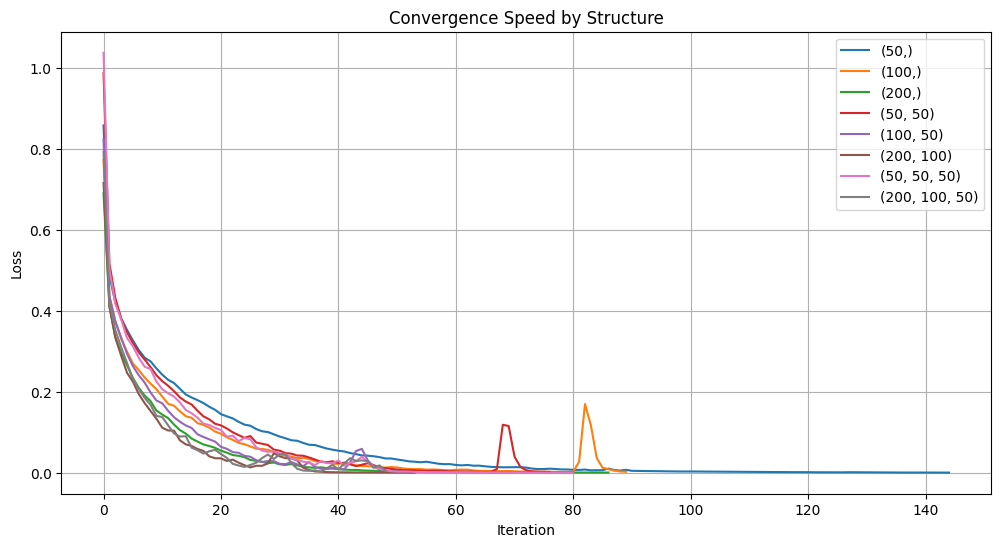

In [ ]:
# NUMBER OF HIDDEN LAYERS & NEURONS 1 with graph
import matplotlib.pyplot as plt

layers_and_neurons = [
    (50,),
    (100,),
    (200,),
    (50, 50),
    (100, 50),
    (200, 100),
    (50, 50, 50),
    (200, 100, 50)
]

plt.figure(figsize=(12, 6))

for i in range(len(layers_and_neurons)):
    mlp = MLPClassifier(hidden_layer_sizes=layers_and_neurons[i], max_iter=200,random_state=1)
    mlp.fit(X_train_sample, y_train_sample)
    plt.plot(mlp.loss_curve_, label=str(layers_and_neurons[i]))

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Convergence Speed by Structure')
plt.legend()
plt.grid(True)
plt.show()

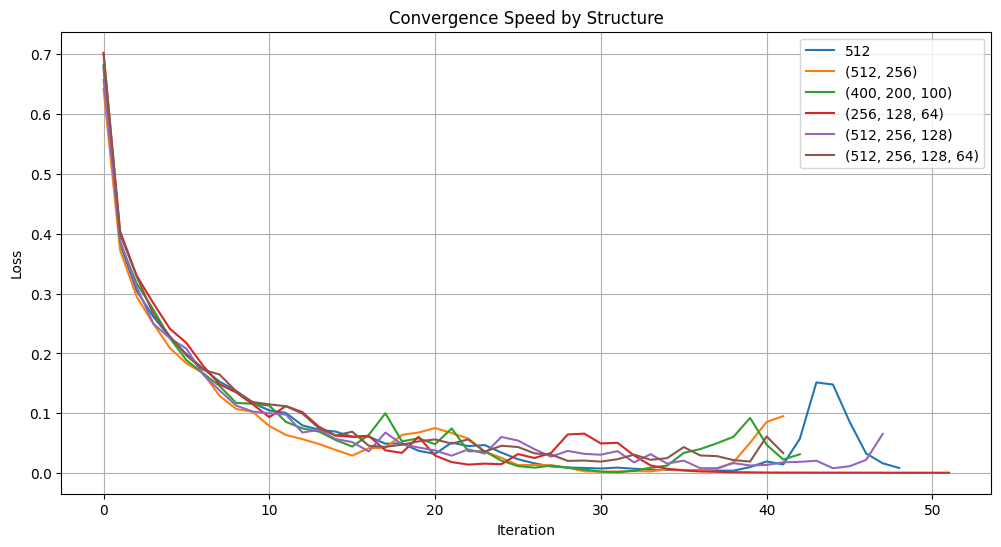

In [ ]:
# NUMBER OF HIDDEN LAYERS & NEURONS 2 with graph
import matplotlib.pyplot as plt

layers_and_neurons = [
    (512),
    (512, 256),
    (400, 200, 100),
    (256, 128, 64),
    (512, 256, 128),
    (512, 256, 128, 64)
]

plt.figure(figsize=(12, 6))

for i in range(len(layers_and_neurons)):
    mlp = MLPClassifier(hidden_layer_sizes=layers_and_neurons[i], max_iter=200,random_state=1)
    mlp.fit(X_train_sample, y_train_sample)
    plt.plot(mlp.loss_curve_, label=str(layers_and_neurons[i]))

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Convergence Speed by Structure')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# ACTIVATION FUNCTIONS
activation_functions = ['relu', 'logistic', 'tanh', 'identity']
structures = [(200,), (200, 100), (200, 100, 50)]

for structure in structures:
  print(f"\n{'============================='}")
  print(f"Testing Structure (Hidden Layers & Neurons): {structure}")
  print(f"{'============================='}\n")

  for activation in activation_functions:
      mlp = MLPClassifier(hidden_layer_sizes=structure, activation=activation, max_iter=200, random_state=1)

      start_time = time.time()
      mlp.fit(X_train_sample, y_train_sample)
      training_time = time.time() - start_time
      y_pred = mlp.predict(X_test)

      train_acc = accuracy_score(y_train_sample, mlp.predict(X_train_sample))
      test_acc = accuracy_score(y_test, y_pred)

      print(f"Activation Function: {activation}")
      print(f"Iterations to Converge: {mlp.n_iter_}")
      print(f"Final Loss: {mlp.loss_curve_[-1]:.4f}")
      print(f"Training Time: {training_time:.2f} seconds")
      print(f"Training Accuracy: {train_acc:.4f}")
      print(f"Test Accuracy: {test_acc:.4f}")
      print()



Testing Structure (Hidden Layers & Neurons): (200,)

Activation Function: relu
Iterations to Converge: 87
Final Loss: 0.0011
Training Time: 55.45 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8588

Activation Function: logistic
Iterations to Converge: 134
Final Loss: 0.0022
Training Time: 92.66 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8573

Activation Function: tanh
Iterations to Converge: 87
Final Loss: 0.0014
Training Time: 65.35 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8538

Activation Function: identity
Iterations to Converge: 93
Final Loss: 0.1848
Training Time: 53.32 seconds
Training Accuracy: 0.9341
Test Accuracy: 0.7979


Testing Structure (Hidden Layers & Neurons): (200, 100)

Activation Function: relu
Iterations to Converge: 54
Final Loss: 0.0009
Training Time: 47.18 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8640

Activation Function: logistic
Iterations to Converge: 89
Final Loss: 0.0020
Training Time: 68.08 seconds
Training Accuracy: 1.000

In [ ]:
# OPTIMIZATION METHOD & LEARNING RATE
optimization_methods = [
    ('adam', {}),  # Adam doesn't use momentum
    ('sgd', {'momentum': 0}),
    ('sgd', {'momentum': 0.5}),
    ('sgd', {'momentum': 0.9}),
    ('sgd', {'momentum': 0.99}),
]

learning_rates = [0.001, 0.01, 0.1]
structure = (200, 100)

for opt_method, config in optimization_methods:
    momentum = config.get('momentum', 'N/A')
    print(f"\n{'============================='}")
    print(f"Testing Solver: {opt_method}, Momentum: {momentum}")
    print(f"{'============================='}\n")
    for lr in learning_rates:
        mlp_params = {
            'hidden_layer_sizes': structure,
            'solver': opt_method,
            'learning_rate_init': lr,
            'max_iter': 200,
            'random_state': 1
        }

        # Add momentum only for SGD
        if 'momentum' in config:
            mlp_params['momentum'] = config['momentum']

        mlp = MLPClassifier(**mlp_params)
        start_time = time.time()
        mlp.fit(X_train_sample, y_train_sample)
        training_time = time.time() - start_time
        y_pred = mlp.predict(X_test)

        train_acc = accuracy_score(y_train_sample, mlp.predict(X_train_sample))
        test_acc = accuracy_score(y_test, y_pred)

        print(f"Learning Rate: {lr}")
        print(f"Iterations to Converge: {mlp.n_iter_}")
        print(f"Final Loss: {mlp.loss_curve_[-1]:.4f}")
        print(f"Training Time: {training_time:.2f} seconds")
        print(f"Training Accuracy: {train_acc:.4f}")
        print(f"Test Accuracy: {test_acc:.4f}")
        print()


Testing Solver: adam, Momentum: N/A

Learning Rate: 0.001
Iterations to Converge: 54
Final Loss: 0.0009
Training Time: 35.03 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8640

Learning Rate: 0.01
Iterations to Converge: 41
Final Loss: 0.2089
Training Time: 26.92 seconds
Training Accuracy: 0.9487
Test Accuracy: 0.8367

Learning Rate: 0.1
Iterations to Converge: 13
Final Loss: 2.3177
Training Time: 9.15 seconds
Training Accuracy: 0.1000
Test Accuracy: 0.1000


Testing Solver: sgd, Momentum: 0



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate: 0.001
Iterations to Converge: 200
Final Loss: 0.3696
Training Time: 121.41 seconds
Training Accuracy: 0.8712
Test Accuracy: 0.8305



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate: 0.01
Iterations to Converge: 200
Final Loss: 0.0592
Training Time: 119.69 seconds
Training Accuracy: 0.9917
Test Accuracy: 0.8537

Learning Rate: 0.1
Iterations to Converge: 96
Final Loss: 0.0027
Training Time: 56.29 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8560


Testing Solver: sgd, Momentum: 0.5



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate: 0.001
Iterations to Converge: 200
Final Loss: 0.2868
Training Time: 120.01 seconds
Training Accuracy: 0.9027
Test Accuracy: 0.8453



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate: 0.01
Iterations to Converge: 200
Final Loss: 0.0124
Training Time: 120.88 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8541

Learning Rate: 0.1
Iterations to Converge: 62
Final Loss: 0.0019
Training Time: 37.67 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8587


Testing Solver: sgd, Momentum: 0.9



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate: 0.001
Iterations to Converge: 200
Final Loss: 0.0591
Training Time: 119.60 seconds
Training Accuracy: 0.9916
Test Accuracy: 0.8537

Learning Rate: 0.01
Iterations to Converge: 89
Final Loss: 0.0028
Training Time: 52.67 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8531

Learning Rate: 0.1
Iterations to Converge: 67
Final Loss: 0.0004
Training Time: 39.32 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8598


Testing Solver: sgd, Momentum: 0.99

Learning Rate: 0.001
Iterations to Converge: 102
Final Loss: 0.0028
Training Time: 61.57 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8548

Learning Rate: 0.01
Iterations to Converge: 64
Final Loss: 0.0617
Training Time: 38.50 seconds
Training Accuracy: 0.9922
Test Accuracy: 0.8461

Learning Rate: 0.1
Iterations to Converge: 12
Final Loss: 2.4172
Training Time: 6.10 seconds
Training Accuracy: 0.1000
Test Accuracy: 0.1000



In [ ]:
# EARLY STOPPING SETTINGS
configurations = [
    {'early_stopping': False},
    {'early_stopping': True, 'n_iter_no_change': 5},
    {'early_stopping': True, 'n_iter_no_change': 10},
    {'early_stopping': True, 'n_iter_no_change': 20},
]

structure = (200, 100)

for config in configurations:
    print(f"\n{'============================='}")
    print(f"Testing Early Stopping: {config}")
    print(f"{'============================='}\n")

    mlp = MLPClassifier(
        hidden_layer_sizes=structure,
        max_iter=200,
        random_state=1,
        **config
    )

    start_time = time.time()
    mlp.fit(X_train_sample, y_train_sample)
    training_time = time.time() - start_time
    y_pred = mlp.predict(X_test)

    train_acc = accuracy_score(y_train_sample, mlp.predict(X_train_sample))
    test_acc = accuracy_score(y_test, y_pred)

    print(f"Iterations to Converge: {mlp.n_iter_}")
    print(f"Final Loss: {mlp.loss_curve_[-1]:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    if config['early_stopping']:
        print(f"Best Validation Score: {mlp.best_validation_score_:.4f}")
    print()


Testing Early Stopping: {'early_stopping': False}

Iterations to Converge: 54
Final Loss: 0.0009
Training Time: 36.27 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8640


Testing Early Stopping: {'early_stopping': True, 'n_iter_no_change': 5}

Iterations to Converge: 16
Final Loss: 0.0622
Training Time: 8.11 seconds
Training Accuracy: 0.9556
Test Accuracy: 0.8569
Best Validation Score: 0.8860


Testing Early Stopping: {'early_stopping': True, 'n_iter_no_change': 10}

Iterations to Converge: 21
Final Loss: 0.0282
Training Time: 12.83 seconds
Training Accuracy: 0.9556
Test Accuracy: 0.8569
Best Validation Score: 0.8860


Testing Early Stopping: {'early_stopping': True, 'n_iter_no_change': 20}

Iterations to Converge: 31
Final Loss: 0.0123
Training Time: 19.90 seconds
Training Accuracy: 0.9556
Test Accuracy: 0.8569
Best Validation Score: 0.8860



Iterations to Converge: 60
Final Loss: 0.0263
Training Time: 256.93 seconds
Training Accuracy: 0.9932
Test Accuracy: 0.8875

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.81      0.82      1000
           3       0.92      0.87      0.89      1000
           4       0.78      0.87      0.82      1000
           5       0.96      0.97      0.96      1000
           6       0.73      0.66      0.70      1000
           7       0.96      0.94      0.95      1000
           8       0.97      0.96      0.97      1000
           9       0.94      0.97      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Confusion Matrix:
[[851   2  17  15  11   2  95   0   7   0]
 [  4 979   3   6   4   1   2  

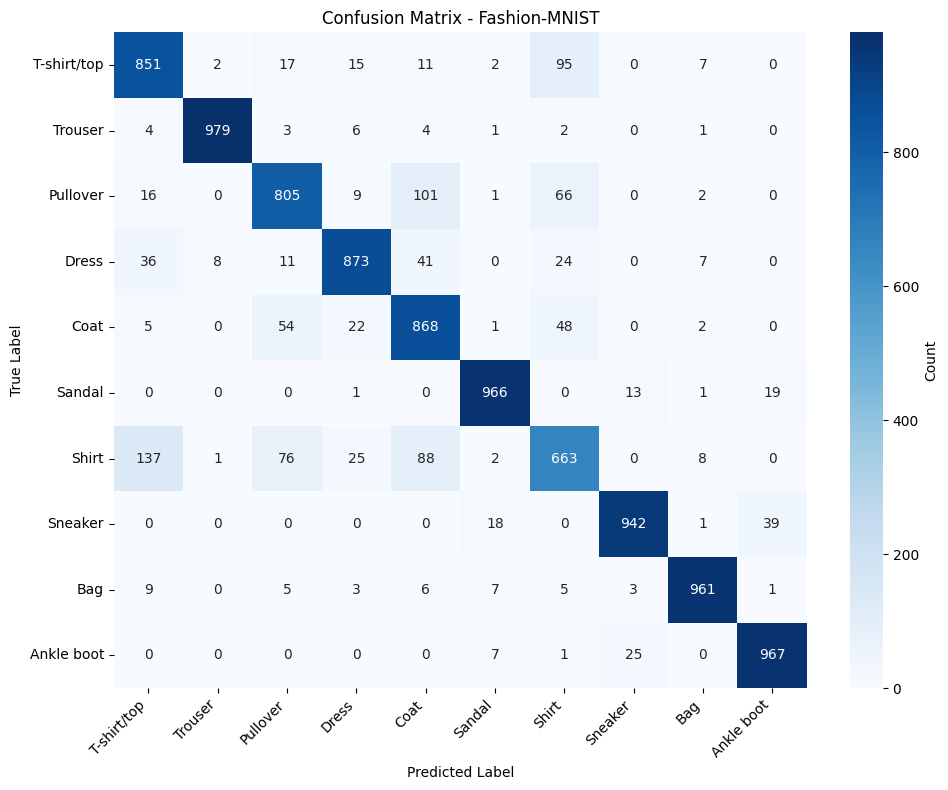

In [ ]:
# First model with info from above, using the full, unsampled data
import time
import matplotlib.pyplot as plt
import seaborn as sns

mlp = MLPClassifier(
    hidden_layer_sizes=(200, 100),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=200,
    early_stopping=False,
    random_state=1
)

start_time = time.time()
mlp.fit(X_train, y_train)
training_time = time.time() - start_time
y_pred = mlp.predict(X_test)

train_acc = accuracy_score(y_train, mlp.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Iterations to Converge: {mlp.n_iter_}")
print(f"Final Loss: {mlp.loss_curve_[-1]:.4f}")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print()
print("Classification Report:")
print(classification_report(y_test, y_pred))
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fashion-MNIST')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Iterations to Converge: 26
Final Loss: 0.2415
Training Time: 128.40 seconds
Training Accuracy: 0.9232
Test Accuracy: 0.8840

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.85      0.78      0.82      1000
           3       0.88      0.90      0.89      1000
           4       0.79      0.84      0.82      1000
           5       0.96      0.94      0.95      1000
           6       0.69      0.73      0.71      1000
           7       0.91      0.97      0.94      1000
           8       0.96      0.97      0.96      1000
           9       0.97      0.93      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000


Confusion Matrix:
[[809   1  15  34   3   0 130   0   8   0]
 [  2 963   3  21   4   0   6  

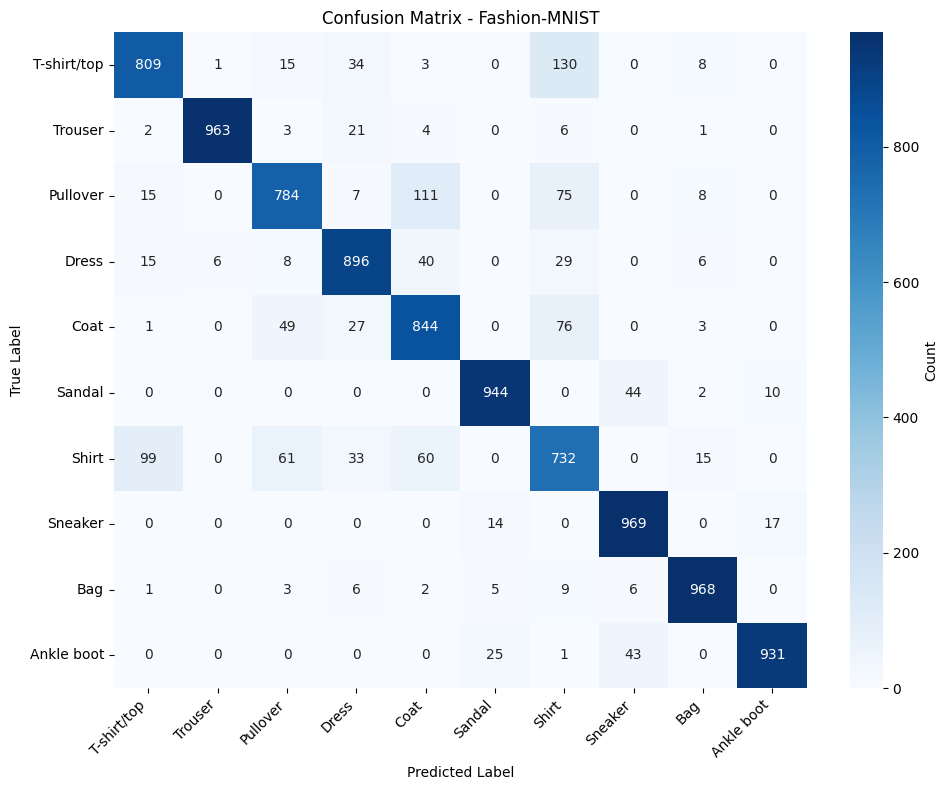

In [ ]:
# Second model
mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu',
    solver='adam',
    momentum=0.9,
    learning_rate_init=0.01,
    max_iter=200,
    early_stopping=True,
    n_iter_no_change=10,
    random_state=1
)

start_time = time.time()
mlp.fit(X_train, y_train)
training_time = time.time() - start_time
y_pred = mlp.predict(X_test)

train_acc = accuracy_score(y_train, mlp.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Iterations to Converge: {mlp.n_iter_}")
print(f"Final Loss: {mlp.loss_curve_[-1]:.4f}")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print()
print("Classification Report:")
print(classification_report(y_test, y_pred))
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fashion-MNIST')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Iterations to Converge: 20
Final Loss: 0.1034
Training Time: 85.89 seconds
Training Accuracy: 0.9507
Test Accuracy: 0.8797

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1000
           1       0.98      0.97      0.97      1000
           2       0.81      0.79      0.80      1000
           3       0.87      0.90      0.89      1000
           4       0.80      0.81      0.80      1000
           5       0.96      0.95      0.96      1000
           6       0.69      0.69      0.69      1000
           7       0.93      0.96      0.95      1000
           8       0.97      0.96      0.97      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Confusion Matrix:
[[819   3  11  33   5   1 119   0   9   0]
 [  0 967   1  24   5   0   2   

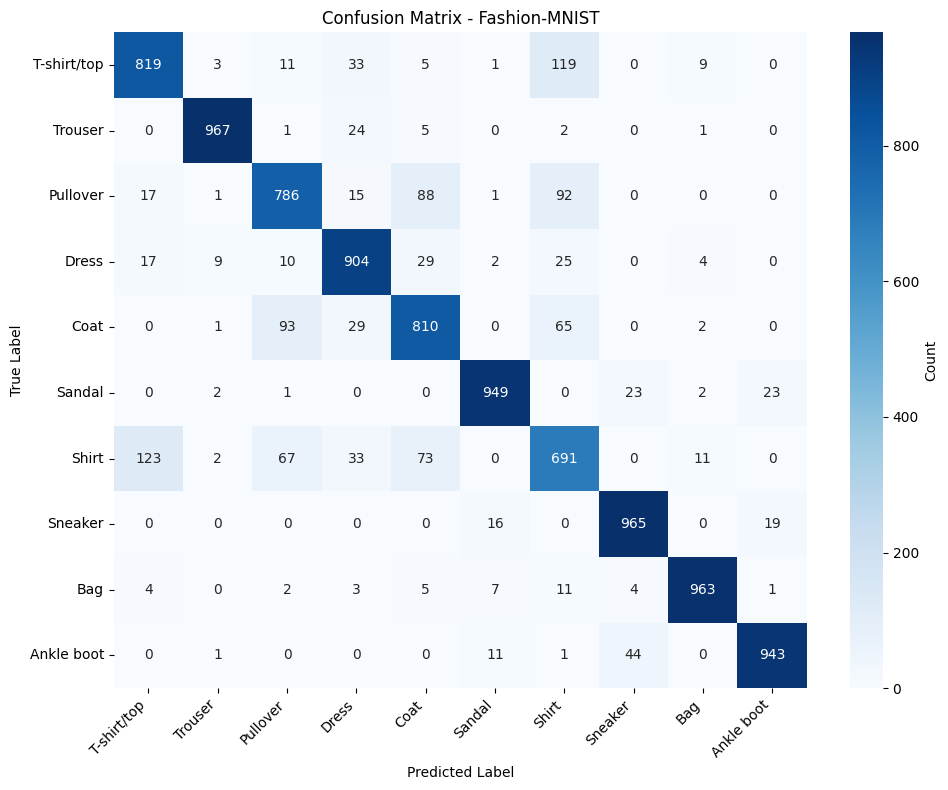

In [ ]:
# Third model
mlp = MLPClassifier(
    hidden_layer_sizes=(200, 100, 50),
    activation='logistic',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=200,
    early_stopping=True,
    n_iter_no_change=5,
    random_state=1
)

start_time = time.time()
mlp.fit(X_train, y_train)
training_time = time.time() - start_time
y_pred = mlp.predict(X_test)

train_acc = accuracy_score(y_train, mlp.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Iterations to Converge: {mlp.n_iter_}")
print(f"Final Loss: {mlp.loss_curve_[-1]:.4f}")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print()
print("Classification Report:")
print(classification_report(y_test, y_pred))
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fashion-MNIST')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Iterations to Converge: 66
Final Loss: 0.1195
Training Time: 323.42 seconds
Training Accuracy: 0.9507
Test Accuracy: 0.8782

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.78      0.78      1000
           3       0.88      0.89      0.88      1000
           4       0.80      0.82      0.81      1000
           5       0.97      0.94      0.96      1000
           6       0.69      0.67      0.68      1000
           7       0.93      0.96      0.95      1000
           8       0.96      0.96      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Confusion Matrix:
[[834   2  16  20   6   0 112   0  10   0]
 [  6 964   1  21   2   0   6  

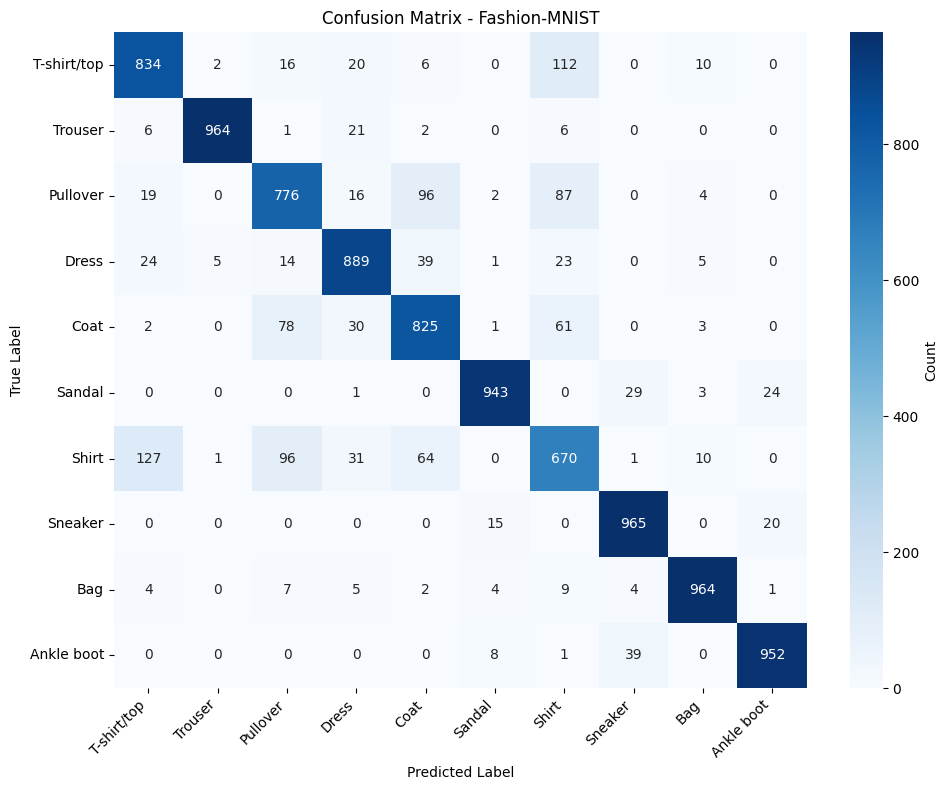

In [ ]:
# Fourth model
mlp = MLPClassifier(
    hidden_layer_sizes=(200, 100),
    activation='tanh',
    solver='sgd',
    momentum=0.5,
    learning_rate_init=0.01,
    max_iter=200,
    early_stopping=True,
    n_iter_no_change=10,
    random_state=1
)

start_time = time.time()
mlp.fit(X_train, y_train)
training_time = time.time() - start_time
y_pred = mlp.predict(X_test)

train_acc = accuracy_score(y_train, mlp.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Iterations to Converge: {mlp.n_iter_}")
print(f"Final Loss: {mlp.loss_curve_[-1]:.4f}")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print()
print("Classification Report:")
print(classification_report(y_test, y_pred))
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fashion-MNIST')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Iterations to Converge: 54
Final Loss: 0.0570
Training Time: 357.87 seconds
Training Accuracy: 0.9831
Test Accuracy: 0.8801

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1000
           1       0.97      0.97      0.97      1000
           2       0.79      0.79      0.79      1000
           3       0.88      0.89      0.89      1000
           4       0.76      0.85      0.80      1000
           5       0.97      0.96      0.96      1000
           6       0.74      0.63      0.68      1000
           7       0.93      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Confusion Matrix:
[[834   4  20  27   3   1 101   0  10   0]
 [  2 970   2  18   2   0   6  

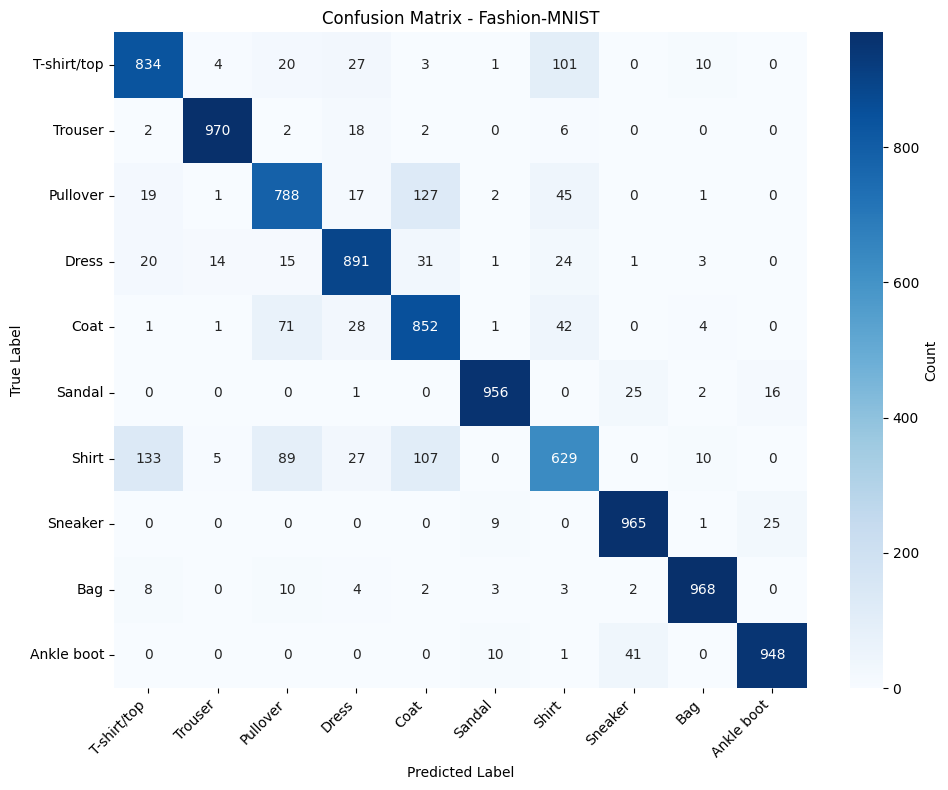

In [ ]:
# Fifth model
mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),
    activation='tanh',
    solver='sgd',
    momentum=0.99,
    learning_rate_init=0.01,
    max_iter=200,
    early_stopping=False,
    n_iter_no_change=10,
    random_state=1
)

start_time = time.time()
mlp.fit(X_train, y_train)
training_time = time.time() - start_time
y_pred = mlp.predict(X_test)

train_acc = accuracy_score(y_train, mlp.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Iterations to Converge: {mlp.n_iter_}")
print(f"Final Loss: {mlp.loss_curve_[-1]:.4f}")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print()
print("Classification Report:")
print(classification_report(y_test, y_pred))
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fashion-MNIST')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# 3. Fashion-MNIST image classification  using pytorch

In [1]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# scale to [0,1], add channel dimension -> (N, 1, 28, 28)
X_train = (X_train.astype("float32") / 255.0)[:, None, :, :]
X_test  = (X_test.astype("float32")  / 255.0)[:,  None, :, :]

y_train = y_train.astype(np.int64)
y_test  = y_test.astype(np.int64)

# train/val split: last 10k of train as validation
X_tr, X_val = X_train[:50000], X_train[50000:]
y_tr, y_val = y_train[:50000], y_train[50000:]

# wrap in PyTorch TensorDatasets and DataLoaders
train_ds = TensorDataset(torch.from_numpy(X_tr),  torch.from_numpy(y_tr))
val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_ds  = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=256, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
import torch.nn as nn
import torch.optim as optim

# In colab, you should ``change runtime type'' to GPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# your code here

Using device: cuda


In [ ]:
# This is the example code from 'Training a Classifier' on PyTorch
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np

import torch.optim as optim

# Load and normalize CIFAR10
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Define a Convolution Neural Network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

# Define a Loss Function & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the Network
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

# Test the Network on the Test Data
dataiter = iter(testloader)
images, labels = next(dataiter)

print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

# How Network Performs on the whole dataset
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# See which classes performed well and which didn't
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

In [3]:
# Simple Model - Dense Neural Network using PyTorch
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import time

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

class MyNeuralNet(nn.Module):
    def __init__(self, fc_layers):
        super().__init__()

        self.fc_layers = nn.ModuleList()
        input_size = 28 * 28  # Flattened image size (784)

        for neurons in fc_layers:
            self.fc_layers.append(nn.Linear(input_size, neurons))
            input_size = neurons

        self.fc_out = nn.Linear(input_size, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)  # Flatten images to 784 dimensions

        # Pass through all hidden layers with relu activation
        for fc in self.fc_layers:
            x = F.relu(fc(x))

        x = self.fc_out(x)
        return x


structure = (200, 100)

net = MyNeuralNet(structure)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training
start_time = time.time()
epoch_losses = []

for epoch in range(15):
    epoch_loss = 0.0
    batch_count = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        batch_count += 1

    epoch_losses.append(epoch_loss / batch_count)

training_time = time.time() - start_time

# Validation accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in val_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

val_accuracy = 100 * correct / total

# Training accuracy
train_correct = 0
train_total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

train_accuracy = 100 * train_correct / train_total

total_params = sum(p.numel() for p in net.parameters())

print(f"Hidden Layers & Neurons: {structure}")
print(f"Epochs: 15")
print(f"Final Loss: {epoch_losses[-1]:.4f}")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Training Accuracy: {train_accuracy:.4f}%")
print(f"Validation Accuracy: {val_accuracy:.4f}%")
print(f"Total Parameters: {total_params:,}")


Hidden Layers & Neurons: (200, 100)
Epochs: 15
Final Loss: 0.4584
Training Time: 18.73 seconds
Training Accuracy: 84.2100%
Validation Accuracy: 83.0900%
Total Parameters: 178,110


In [ ]:
# Dense Neural Network - NUMBER OF HIDDEN LAYERS & NEURONS
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import time

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

class MyNeuralNet(nn.Module):
    def __init__(self, fc_layers):
        super().__init__()

        self.fc_layers = nn.ModuleList()
        input_size = 28 * 28  # Flattened image size (784)

        for neurons in fc_layers:
            self.fc_layers.append(nn.Linear(input_size, neurons))
            input_size = neurons

        self.fc_out = nn.Linear(input_size, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)  # Flatten images to 784 dimensions

        # Pass through all hidden layers with relu activation
        for fc in self.fc_layers:
            x = F.relu(fc(x))

        x = self.fc_out(x)
        return x


fc_structures = [
    (128,),
    (256,),
    (512,),
    (256, 128),
    (512, 256),
    (512, 256, 128),
    (256, 128, 64),
    (784, 392, 196),
    (1024, 512, 256),
]

results = []

for struct in fc_structures:

    net = MyNeuralNet(struct)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    # Training
    start_time = time.time()
    epoch_losses = []

    for epoch in range(15):
        epoch_loss = 0.0
        batch_count = 0

        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            batch_count += 1

        epoch_losses.append(epoch_loss / batch_count)

    training_time = time.time() - start_time

    # Validation accuracy
    correct = 0
    total = 0
    with torch.no_grad():
        for data in val_loader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total

    # Training accuracy
    train_correct = 0
    train_total = 0
    with torch.no_grad():
        for data in train_loader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

    train_accuracy = 100 * train_correct / train_total

    # Count total parameters
    total_params = sum(p.numel() for p in net.parameters())

    results.append({
        'structure': struct,
        'final_loss': epoch_losses[-1],
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'training_time': training_time,
        'total_params': total_params
    })

    print(f"Hidden Layers & Neurons: {struct}")
    print(f"Epochs: 15")
    print(f"Final Loss: {epoch_losses[-1]:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print(f"Training Accuracy: {train_accuracy:.4f}%")
    print(f"Validation Accuracy: {val_accuracy:.4f}%")
    print(f"Total Parameters: {total_params:,}")
    print()


print(f"\n{'========================================'}")
print("COMPARISON OF ALL STRUCTURES")
print(f"{'========================================'}\n")
print(f"{'Structure':<25} {'Final Loss':<12} {'Train Acc':<12} {'Val Acc':<12} {'Time (s)':<10} {'Params':<12}")
print(f"{'----------------------------------------------------------------------------------------------------'}")
for r in results:
    struct_str = str(r['structure'])
    print(f"{struct_str:<25} {r['final_loss']:<12.4f} {r['train_accuracy']:<12.2f} {r['val_accuracy']:<12.2f} {r['training_time']:<10.2f} {r['total_params']:<12,}")

best_val = max(results, key=lambda x: x['val_accuracy'])
best_train = max(results, key=lambda x: x['train_accuracy'])
fastest = min(results, key=lambda x: x['training_time'])

print(f"\n{'========================================'}")
print("BEST PERFORMERS")

print(f"{'========================================'}\n")
print(f"Best Validation Accuracy: {best_val['structure']} ({best_val['val_accuracy']:.2f}%)")
print(f"Best Training Accuracy: {best_train['structure']} ({best_train['train_accuracy']:.2f}%)")
print(f"Fastest Training: {fastest['structure']} ({fastest['training_time']:.2f}s)")

Hidden Layers & Neurons: (128,)
Epochs: 15
Final Loss: 0.4681
Training Time: 15.01 seconds
Training Accuracy: 84.1500%
Validation Accuracy: 83.0900%
Total Parameters: 101,770

Hidden Layers & Neurons: (256,)
Epochs: 15
Final Loss: 0.4642
Training Time: 20.42 seconds
Training Accuracy: 84.4500%
Validation Accuracy: 83.5500%
Total Parameters: 203,530

Hidden Layers & Neurons: (512,)
Epochs: 15
Final Loss: 0.4596
Training Time: 29.89 seconds
Training Accuracy: 84.5840%
Validation Accuracy: 83.7200%
Total Parameters: 407,050

Hidden Layers & Neurons: (256, 128)
Epochs: 15
Final Loss: 0.4602
Training Time: 23.33 seconds
Training Accuracy: 84.2240%
Validation Accuracy: 83.2800%
Total Parameters: 235,146

Hidden Layers & Neurons: (512, 256)
Epochs: 15
Final Loss: 0.4500
Training Time: 41.31 seconds
Training Accuracy: 84.8600%
Validation Accuracy: 83.8700%
Total Parameters: 535,818

Hidden Layers & Neurons: (512, 256, 128)
Epochs: 15
Final Loss: 0.4703
Training Time: 49.41 seconds
Training Acc

In [ ]:
# Dense Neural Network - ACTIVATION FUNCTIONS
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import time

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

class MyNeuralNet(nn.Module):
    def __init__(self, fc_layers, activation='relu'):
        super().__init__()

        self.fc_layers = nn.ModuleList()
        input_size = 28 * 28  # Flattened image size (784)

        for neurons in fc_layers:
            self.fc_layers.append(nn.Linear(input_size, neurons))
            input_size = neurons

        self.fc_out = nn.Linear(input_size, 10)

        self.activation = activation

    def forward(self, x):
        x = torch.flatten(x, 1)

        # Pass through all hidden layers with specified activation
        for fc in self.fc_layers:
            x = fc(x)

            # Apply activation function
            if self.activation == 'relu':
                x = F.relu(x)
            elif self.activation == 'sigmoid':
                x = torch.sigmoid(x)
            elif self.activation == 'tanh':
                x = torch.tanh(x)
            elif self.activation == 'leaky_relu':
                x = F.leaky_relu(x)
            elif self.activation == 'elu':
                x = F.elu(x)
            elif self.activation == 'identity':
                pass  # No activation (linear)

        x = self.fc_out(x)
        return x


activation_functions = ['relu', 'sigmoid', 'tanh', 'leaky_relu', 'elu', 'identity']
fc_structures = [(128,), (512, 256), (784, 392, 196)]

results = []

for activation in activation_functions:
    for struct in fc_structures:

        net = MyNeuralNet(struct, activation=activation)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

        # Training
        start_time = time.time()
        epoch_losses = []

        for epoch in range(15):
            epoch_loss = 0.0
            batch_count = 0

            for i, data in enumerate(train_loader, 0):
                inputs, labels = data
                optimizer.zero_grad()

                outputs = net(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                epoch_loss += loss.item()
                batch_count += 1

            epoch_losses.append(epoch_loss / batch_count)

        training_time = time.time() - start_time

        # Validation accuracy
        correct = 0
        total = 0
        with torch.no_grad():
            for data in val_loader:
                images, labels = data
                outputs = net(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_accuracy = 100 * correct / total

        # Training accuracy
        train_correct = 0
        train_total = 0
        with torch.no_grad():
            for data in train_loader:
                images, labels = data
                outputs = net(images)
                _, predicted = torch.max(outputs, 1)
                train_total += labels.size(0)
                train_correct += (predicted == labels).sum().item()

        train_accuracy = 100 * train_correct / train_total

        total_params = sum(p.numel() for p in net.parameters())

        results.append({
            'activation': activation,
            'structure': struct,
            'final_loss': epoch_losses[-1],
            'train_accuracy': train_accuracy,
            'val_accuracy': val_accuracy,
            'training_time': training_time,
            'total_params': total_params
        })

        print(f"Activation Function: {activation}")
        print(f"Hidden Layers & Neurons: {struct}")
        print(f"Epochs: 15")
        print(f"Final Loss: {epoch_losses[-1]:.4f}")
        print(f"Training Time: {training_time:.2f} seconds")
        print(f"Training Accuracy: {train_accuracy:.4f}%")
        print(f"Validation Accuracy: {val_accuracy:.4f}%")
        print(f"Total Parameters: {total_params:,}")
        print()

print(f"\n{'=============================================================='}")
print("COMPARISON OF ALL ACTIVATION FUNCTIONS AND STRUCTURES")
print(f"{'=============================================================='}\n")
print(f"{'Activation':<15} {'Structure':<20} {'Final Loss':<12} {'Train Acc':<12} {'Val Acc':<12} {'Time (s)':<10} {'Params':<12}")
print(f"{'-------------------------------------------------------------------------------------------'}")
for r in results:
    struct_str = str(r['structure'])
    print(f"{r['activation']:<15} {struct_str:<20} {r['final_loss']:<12.4f} {r['train_accuracy']:<12.2f} {r['val_accuracy']:<12.2f} {r['training_time']:<10.2f} {r['total_params']:<12,}")

best_val = max(results, key=lambda x: x['val_accuracy'])
best_train = max(results, key=lambda x: x['train_accuracy'])
fastest = min(results, key=lambda x: x['training_time'])

print(f"\n{'=============================================================='}")
print("BEST PERFORMERS")
print(f"{'=============================================================='}\n")
print(f"Best Validation Accuracy: {best_val['activation']} with {best_val['structure']} ({best_val['val_accuracy']:.2f}%)")
print(f"Best Training Accuracy: {best_train['activation']} with {best_train['structure']} ({best_train['train_accuracy']:.2f}%)")
print(f"Fastest Training: {fastest['activation']} with {fastest['structure']} ({fastest['training_time']:.2f}s)")

print(f"\n{'=============================================================='}")
print("AVERAGE PERFORMANCE BY ACTIVATION FUNCTION")
print(f"{'=============================================================='}\n")
print(f"{'Activation':<15} {'Avg Val Acc':<15} {'Avg Train Acc':<15} {'Avg Time':<15}")
print(f"{'-------------------------------------------------------------------------------------------'}")
for activation in activation_functions:
    act_results = [r for r in results if r['activation'] == activation]
    avg_val = sum(r['val_accuracy'] for r in act_results) / len(act_results)
    avg_train = sum(r['train_accuracy'] for r in act_results) / len(act_results)
    avg_time = sum(r['training_time'] for r in act_results) / len(act_results)
    print(f"{activation:<15} {avg_val:<15.2f} {avg_train:<15.2f} {avg_time:<15.2f}")


Activation Function: relu
Hidden Layers & Neurons: (128,)
Epochs: 15
Final Loss: 0.4673
Training Time: 14.67 seconds
Training Accuracy: 84.2380%
Validation Accuracy: 83.2800%
Total Parameters: 101,770

Activation Function: relu
Hidden Layers & Neurons: (512, 256)
Epochs: 15
Final Loss: 0.4477
Training Time: 31.93 seconds
Training Accuracy: 84.7900%
Validation Accuracy: 83.9300%
Total Parameters: 535,818

Activation Function: relu
Hidden Layers & Neurons: (784, 392, 196)
Epochs: 15
Final Loss: 0.4633
Training Time: 57.10 seconds
Training Accuracy: 84.3120%
Validation Accuracy: 83.4400%
Total Parameters: 1,002,158

Activation Function: sigmoid
Hidden Layers & Neurons: (128,)
Epochs: 15
Final Loss: 0.6907
Training Time: 14.78 seconds
Training Accuracy: 76.1440%
Validation Accuracy: 76.0000%
Total Parameters: 101,770

Activation Function: sigmoid
Hidden Layers & Neurons: (512, 256)
Epochs: 15
Final Loss: 1.1455
Training Time: 31.52 seconds
Training Accuracy: 59.9520%
Validation Accuracy: 6

In [ ]:
# Dense Neural Network - OPTIMIZATION METHOD & LEARNING RATE
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import time

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

class MyNeuralNet(nn.Module):
    def __init__(self, fc_layers):
        super().__init__()

        self.fc_layers = nn.ModuleList()
        input_size = 28 * 28  # Flattened image size (784)

        for neurons in fc_layers:
            self.fc_layers.append(nn.Linear(input_size, neurons))
            input_size = neurons

        self.fc_out = nn.Linear(input_size, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)  # Flatten images to 784 dimensions

        # Pass through all hidden layers with relu activation
        for fc in self.fc_layers:
            x = F.relu(fc(x))

        x = self.fc_out(x)
        return x


optimization_methods = [
    ('sgd', {'momentum': 0}),
    ('sgd', {'momentum': 0.5}),
    ('sgd', {'momentum': 0.9}),     # common choice
    ('sgd', {'momentum': 0.99}),
    ('adam', {}),
    ('adamw', {}),                  # AdamW = Adam with weight decay
]

learning_rates = [0.0001, 0.001, 0.01, 0.1]
structure = (512, 256)

results = []

for opt_name, opt_params in optimization_methods:
    for lr in learning_rates:

        net = MyNeuralNet(structure)
        criterion = nn.CrossEntropyLoss()

        # Create optimizer based on method
        if opt_name == 'sgd':
            optimizer = optim.SGD(net.parameters(), lr=lr, momentum=opt_params.get('momentum', 0))
        elif opt_name == 'adam':
            optimizer = optim.Adam(net.parameters(), lr=lr)
        elif opt_name == 'adamw':
            optimizer = optim.AdamW(net.parameters(), lr=lr)

        # Create optimizer description string
        if opt_name == 'sgd':
            opt_desc = f"SGD (momentum={opt_params['momentum']})"
        else:
            opt_desc = opt_name.upper()

        # Training
        start_time = time.time()
        epoch_losses = []

        for epoch in range(15):
            epoch_loss = 0.0
            batch_count = 0

            for i, data in enumerate(train_loader, 0):
                inputs, labels = data
                optimizer.zero_grad()

                outputs = net(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                epoch_loss += loss.item()
                batch_count += 1

            epoch_losses.append(epoch_loss / batch_count)

        training_time = time.time() - start_time

        # Validation accuracy
        correct = 0
        total = 0
        with torch.no_grad():
            for data in val_loader:
                images, labels = data
                outputs = net(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_accuracy = 100 * correct / total

        # Training accuracy
        train_correct = 0
        train_total = 0
        with torch.no_grad():
            for data in train_loader:
                images, labels = data
                outputs = net(images)
                _, predicted = torch.max(outputs, 1)
                train_total += labels.size(0)
                train_correct += (predicted == labels).sum().item()

        train_accuracy = 100 * train_correct / train_total

        total_params = sum(p.numel() for p in net.parameters())

        results.append({
            'optimizer': opt_desc,
            'learning_rate': lr,
            'structure': structure,
            'final_loss': epoch_losses[-1],
            'train_accuracy': train_accuracy,
            'val_accuracy': val_accuracy,
            'training_time': training_time,
            'total_params': total_params
        })

        print(f"Optimizer: {opt_desc}")
        print(f"Learning Rate: {lr}")
        print(f"Hidden Layers & Neurons: {structure}")
        print(f"Epochs: 15")
        print(f"Final Loss: {epoch_losses[-1]:.4f}")
        print(f"Training Time: {training_time:.2f} seconds")
        print(f"Training Accuracy: {train_accuracy:.4f}%")
        print(f"Validation Accuracy: {val_accuracy:.4f}%")
        print(f"Total Parameters: {total_params:,}")
        print()

print("===============================================================")
print("COMPARISON OF ALL OPTIMIZERS AND LEARNING RATES")
print("===============================================================")
print(f"{'Optimizer':<25} {'Learning Rate':<15} {'Final Loss':<12} {'Train Acc':<12} {'Val Acc':<12} {'Time (s)':<10}")
print("------------------------------------------------------------------------------")
for r in results:
    print(f"{r['optimizer']:<25} {r['learning_rate']:<15} {r['final_loss']:<12.4f} {r['train_accuracy']:<12.2f} {r['val_accuracy']:<12.2f} {r['training_time']:<10.2f}")

best_val = max(results, key=lambda x: x['val_accuracy'])
best_train = max(results, key=lambda x: x['train_accuracy'])
fastest = min(results, key=lambda x: x['training_time'])

print("===============================================================")
print("BEST PERFORMERS")
print("===============================================================")
print(f"Best Validation Accuracy: {best_val['optimizer']} with LR={best_val['learning_rate']} ({best_val['val_accuracy']:.2f}%)")
print(f"Best Training Accuracy: {best_train['optimizer']} with LR={best_train['learning_rate']} ({best_train['train_accuracy']:.2f}%)")
print(f"Fastest Training: {fastest['optimizer']} with LR={fastest['learning_rate']} ({fastest['training_time']:.2f}s)")

print("===============================================================")
print("AVERAGE PERFORMANCE BY OPTIMIZER")
print("===============================================================")
print(f"{'Optimizer':<25} {'Avg Val Acc':<15} {'Avg Train Acc':<15} {'Avg Time':<15}")
print("------------------------------------------------------------------------------")
optimizers = list(set(r['optimizer'] for r in results))
for optimizer in sorted(optimizers):
    opt_results = [r for r in results if r['optimizer'] == optimizer]
    avg_val = sum(r['val_accuracy'] for r in opt_results) / len(opt_results)
    avg_train = sum(r['train_accuracy'] for r in opt_results) / len(opt_results)
    avg_time = sum(r['training_time'] for r in opt_results) / len(opt_results)
    print(f"{optimizer:<25} {avg_val:<15.2f} {avg_train:<15.2f} {avg_time:<15.2f}")

print("===============================================================")
print("AVERAGE PERFORMANCE BY LEARNING RATE")
print("===============================================================")
print(f"{'Learning Rate':<15} {'Avg Val Acc':<15} {'Avg Train Acc':<15} {'Avg Time':<15}")
print("------------------------------------------------------------------------------")
for lr in learning_rates:
    lr_results = [r for r in results if r['learning_rate'] == lr]
    avg_val = sum(r['val_accuracy'] for r in lr_results) / len(lr_results)
    avg_train = sum(r['train_accuracy'] for r in lr_results) / len(lr_results)
    avg_time = sum(r['training_time'] for r in lr_results) / len(lr_results)
    print(f"{lr:<15} {avg_val:<15.2f} {avg_train:<15.2f} {avg_time:<15.2f}")


Optimizer: SGD (momentum=0)
Learning Rate: 0.0001
Hidden Layers & Neurons: (512, 256)
Epochs: 15
Final Loss: 2.2372
Training Time: 40.11 seconds
Training Accuracy: 22.7420%
Validation Accuracy: 23.4000%
Total Parameters: 535,818

Optimizer: SGD (momentum=0)
Learning Rate: 0.001
Hidden Layers & Neurons: (512, 256)
Epochs: 15
Final Loss: 0.9986
Training Time: 30.46 seconds
Training Accuracy: 66.3500%
Validation Accuracy: 67.2000%
Total Parameters: 535,818

Optimizer: SGD (momentum=0)
Learning Rate: 0.01
Hidden Layers & Neurons: (512, 256)
Epochs: 15
Final Loss: 0.4517
Training Time: 29.92 seconds
Training Accuracy: 84.5440%
Validation Accuracy: 83.7900%
Total Parameters: 535,818

Optimizer: SGD (momentum=0)
Learning Rate: 0.1
Hidden Layers & Neurons: (512, 256)
Epochs: 15
Final Loss: 0.2663
Training Time: 29.44 seconds
Training Accuracy: 89.6620%
Validation Accuracy: 87.4100%
Total Parameters: 535,818

Optimizer: SGD (momentum=0.5)
Learning Rate: 0.0001
Hidden Layers & Neurons: (512, 256

In [5]:
# Dense Neural Network - EARLY STOPPING SETTINGS
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import time

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

class MyNeuralNet(nn.Module):
    def __init__(self, fc_layers):
        super().__init__()

        self.fc_layers = nn.ModuleList()
        input_size = 28 * 28  # Flattened image size (784)

        for neurons in fc_layers:
            self.fc_layers.append(nn.Linear(input_size, neurons))
            input_size = neurons

        self.fc_out = nn.Linear(input_size, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)  # Flatten images to 784 dimensions

        # Pass through all hidden layers with relu activation
        for fc in self.fc_layers:
            x = F.relu(fc(x))

        x = self.fc_out(x)
        return x


configurations = [
    {'early_stopping': False},

    {'early_stopping': True, 'n_iter_no_change': 5, 'tolerance': 0.0},
    {'early_stopping': True, 'n_iter_no_change': 10, 'tolerance': 0.0},
    {'early_stopping': True, 'n_iter_no_change': 20, 'tolerance': 0.0},

    {'early_stopping': True, 'n_iter_no_change': 10, 'tolerance': 0.0001},
    {'early_stopping': True, 'n_iter_no_change': 10, 'tolerance': 0.001},

    {'early_stopping': True, 'n_iter_no_change': 20, 'tolerance': 0.0001},
    {'early_stopping': True, 'n_iter_no_change': 20, 'tolerance': 0.001},
]

structure = (512, 256)
max_epochs = 100  # Maximum epochs

results = []

for config in configurations:

    net = MyNeuralNet(structure)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    # Early stopping variables
    best_val_loss = float('inf')
    epochs_no_improve = 0
    best_epoch = 0
    best_model_state = None

    # Training
    start_time = time.time()
    epoch_losses = []
    val_losses = []
    actual_epochs = 0

    for epoch in range(max_epochs):
        # Training phase
        net.train()
        epoch_loss = 0.0
        batch_count = 0

        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            batch_count += 1

        avg_train_loss = epoch_loss / batch_count
        epoch_losses.append(avg_train_loss)

        # Validation phase
        net.eval()
        val_loss = 0.0
        val_batch_count = 0

        with torch.no_grad():
            for data in val_loader:
                images, labels = data
                outputs = net(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                val_batch_count += 1

        avg_val_loss = val_loss / val_batch_count
        val_losses.append(avg_val_loss)
        actual_epochs = epoch + 1

        # Early stopping check with tolerance
        if config['early_stopping']:
            improvement = best_val_loss - avg_val_loss
            if improvement > config.get('tolerance', 0.0):
                best_val_loss = avg_val_loss
                best_model_state = net.state_dict().copy()  # Save best weights
                epochs_no_improve = 0
                best_epoch = epoch + 1
            else:
                epochs_no_improve += 1

            if epochs_no_improve >= config['n_iter_no_change']:
                print(f"Early stopping triggered at epoch {epoch + 1}")
                break

    # Restore best model weights
    if config['early_stopping'] and best_model_state is not None:
        net.load_state_dict(best_model_state)

    training_time = time.time() - start_time

    # Validation accuracy
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in val_loader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total

    # Training accuracy
    train_correct = 0
    train_total = 0
    with torch.no_grad():
        for data in train_loader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

    train_accuracy = 100 * train_correct / train_total

    total_params = sum(p.numel() for p in net.parameters())

    if config['early_stopping']:
        tolerance = config.get('tolerance', 0.0)
        config_desc = f"ES (patience={config['n_iter_no_change']}, tol={tolerance})"
    else:
        config_desc = "No Early Stopping"

    results.append({
        'configuration': config_desc,
        'early_stopping': config['early_stopping'],
        'patience': config.get('n_iter_no_change', 'N/A'),
        'tolerance': config.get('tolerance', 'N/A'),
        'epochs_trained': actual_epochs,
        'best_epoch': best_epoch if config['early_stopping'] else actual_epochs,
        'final_loss': epoch_losses[-1],
        'final_val_loss': val_losses[-1],
        'best_val_loss': best_val_loss if config['early_stopping'] else min(val_losses),
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'training_time': training_time,
        'total_params': total_params
    })

    print(f"Configuration: {config_desc}")
    print(f"Hidden Layers & Neurons: {structure}")
    print(f"Epochs Trained: {actual_epochs}")
    if config['early_stopping']:
        print(f"Best Epoch: {best_epoch}")
        print(f"Best Validation Loss: {best_val_loss:.4f}")
    print(f"Final Training Loss: {epoch_losses[-1]:.4f}")
    print(f"Final Validation Loss: {val_losses[-1]:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print(f"Training Accuracy: {train_accuracy:.4f}%")
    print(f"Validation Accuracy: {val_accuracy:.4f}%")
    print(f"Total Parameters: {total_params:,}")
    print()

print("===================================================================")
print("COMPARISON OF ALL EARLY STOPPING CONFIGURATIONS")
print("===================================================================")
print(f"{'Configuration':<35} {'Patience':<10} {'Tolerance':<12} {'Epochs':<10} {'Best Epoch':<12} {'Best Val Loss':<15} {'Train Acc':<12} {'Val Acc':<12} {'Time (s)':<10}")
print("-------------------------------------------------------------------")
for r in results:
    print(f"{r['configuration']:<35} {str(r['patience']):<10} {str(r['tolerance']):<12} {r['epochs_trained']:<10} {r['best_epoch']:<12} {r['best_val_loss']:<15.4f} {r['train_accuracy']:<12.2f} {r['val_accuracy']:<12.2f} {r['training_time']:<10.2f}")

best_val = max(results, key=lambda x: x['val_accuracy'])
fastest = min(results, key=lambda x: x['training_time'])
fewest_epochs = min(results, key=lambda x: x['epochs_trained'])

print("===================================================================")
print("BEST PERFORMERS")
print("===================================================================")
print(f"Best Validation Accuracy: {best_val['configuration']} ({best_val['val_accuracy']:.2f}% in {best_val['epochs_trained']} epochs)")
print(f"Fastest Training: {fastest['configuration']} ({fastest['training_time']:.2f}s in {fastest['epochs_trained']} epochs)")
print(f"Fewest Epochs: {fewest_epochs['configuration']} ({fewest_epochs['epochs_trained']} epochs, {fewest_epochs['val_accuracy']:.2f}% val acc)")


Configuration: No Early Stopping
Hidden Layers & Neurons: (512, 256)
Epochs Trained: 100
Final Training Loss: 0.2510
Final Validation Loss: 0.3217
Training Time: 244.42 seconds
Training Accuracy: 91.4560%
Validation Accuracy: 88.4600%
Total Parameters: 535,818

Configuration: ES (patience=5, tol=0.0)
Hidden Layers & Neurons: (512, 256)
Epochs Trained: 100
Best Epoch: 99
Best Validation Loss: 0.3188
Final Training Loss: 0.2535
Final Validation Loss: 0.3304
Training Time: 243.43 seconds
Training Accuracy: 90.9660%
Validation Accuracy: 88.1900%
Total Parameters: 535,818

Configuration: ES (patience=10, tol=0.0)
Hidden Layers & Neurons: (512, 256)
Epochs Trained: 100
Best Epoch: 95
Best Validation Loss: 0.3200
Final Training Loss: 0.2502
Final Validation Loss: 0.3212
Training Time: 253.86 seconds
Training Accuracy: 91.4580%
Validation Accuracy: 88.4900%
Total Parameters: 535,818

Configuration: ES (patience=20, tol=0.0)
Hidden Layers & Neurons: (512, 256)
Epochs Trained: 100
Best Epoch: 97

In [4]:
# Dense Neural Network - LOSS FUNCTIONS
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import time

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

class MyNeuralNet(nn.Module):
    def __init__(self, fc_layers):
        super().__init__()

        self.fc_layers = nn.ModuleList()
        input_size = 28 * 28  # Flattened image size (784)

        for neurons in fc_layers:
            self.fc_layers.append(nn.Linear(input_size, neurons))
            input_size = neurons

        self.fc_out = nn.Linear(input_size, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)  # Flatten images to 784 dimensions

        # Pass through all hidden layers with relu activation
        for fc in self.fc_layers:
            x = F.relu(fc(x))

        x = self.fc_out(x)
        return x


# Custom Loss Functions
class FocalLoss(nn.Module):
    """Focal Loss for handling class imbalance"""
    def __init__(self, alpha=1, gamma=2):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss
        return focal_loss.mean()


class LabelSmoothingLoss(nn.Module):
    """Label Smoothing to prevent overconfident predictions"""
    def __init__(self, smoothing=0.1):
        super().__init__()
        self.smoothing = smoothing
        self.confidence = 1.0 - smoothing

    def forward(self, inputs, targets):
        log_probs = F.log_softmax(inputs, dim=1)
        nll_loss = -log_probs.gather(dim=1, index=targets.unsqueeze(1)).squeeze(1)
        smooth_loss = -log_probs.mean(dim=1)
        loss = self.confidence * nll_loss + self.smoothing * smooth_loss
        return loss.mean()


loss_functions = [
    ('cross_entropy', nn.CrossEntropyLoss()),
    ('focal_loss (alpha=1, y=2)', FocalLoss(alpha=1, gamma=2)),
    ('focal_loss (alpha=1, y=3)', FocalLoss(alpha=1, gamma=3)),
    ('label_smoothing (0.05)', LabelSmoothingLoss(smoothing=0.05)),
    ('label_smoothing (0.1)', LabelSmoothingLoss(smoothing=0.1)),
    ('label_smoothing (0.2)', LabelSmoothingLoss(smoothing=0.2)),
]

structure = (512, 256)
num_epochs = 15

results = []

for loss_name, criterion in loss_functions:

    net = MyNeuralNet(structure)
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    # Training
    start_time = time.time()
    epoch_losses = []

    for epoch in range(num_epochs):
        net.train()
        epoch_loss = 0.0
        batch_count = 0

        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            batch_count += 1

        epoch_losses.append(epoch_loss / batch_count)

    training_time = time.time() - start_time

    # Validation accuracy
    net.eval()
    correct = 0
    total = 0
    val_loss = 0.0
    val_batch_count = 0

    with torch.no_grad():
        for data in val_loader:
            images, labels = data
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_batch_count += 1

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    avg_val_loss = val_loss / val_batch_count

    # Training accuracy
    train_correct = 0
    train_total = 0
    with torch.no_grad():
        for data in train_loader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

    train_accuracy = 100 * train_correct / train_total

    total_params = sum(p.numel() for p in net.parameters())

    results.append({
        'loss_function': loss_name,
        'final_train_loss': epoch_losses[-1],
        'final_val_loss': avg_val_loss,
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'training_time': training_time,
        'total_params': total_params
    })

    print(f"Loss Function: {loss_name}")
    print(f"Hidden Layers & Neurons: {structure}")
    print(f"Epochs: {num_epochs}")
    print(f"Final Training Loss: {epoch_losses[-1]:.4f}")
    print(f"Final Validation Loss: {avg_val_loss:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print(f"Training Accuracy: {train_accuracy:.4f}%")
    print(f"Validation Accuracy: {val_accuracy:.4f}%")
    print(f"Total Parameters: {total_params:,}")
    print()

print("========================================================================")
print("COMPARISON OF ALL LOSS FUNCTIONS")
print("========================================================================")
print(f"{'Loss Function':<30} {'Train Loss':<12} {'Val Loss':<12} {'Train Acc':<12} {'Val Acc':<12} {'Time (s)':<10}")
print("------------------------------------------------------------------------")
for r in results:
    print(f"{r['loss_function']:<30} {r['final_train_loss']:<12.4f} {r['final_val_loss']:<12.4f} {r['train_accuracy']:<12.2f} {r['val_accuracy']:<12.2f} {r['training_time']:<10.2f}")

# Find best performing loss functions
best_val = max(results, key=lambda x: x['val_accuracy'])
best_train = max(results, key=lambda x: x['train_accuracy'])
lowest_val_loss = min(results, key=lambda x: x['final_val_loss'])
fastest = min(results, key=lambda x: x['training_time'])

print("========================================================================")
print("BEST PERFORMERS")
print("========================================================================")
print(f"Best Validation Accuracy: {best_val['loss_function']} ({best_val['val_accuracy']:.2f}%)")
print(f"Best Training Accuracy: {best_train['loss_function']} ({best_train['train_accuracy']:.2f}%)")
print(f"Lowest Validation Loss: {lowest_val_loss['loss_function']} ({lowest_val_loss['final_val_loss']:.4f})")
print(f"Fastest Training: {fastest['loss_function']} ({fastest['training_time']:.2f}s)")


Loss Function: cross_entropy
Hidden Layers & Neurons: (512, 256)
Epochs: 15
Final Training Loss: 0.4489
Final Validation Loss: 0.4574
Training Time: 32.93 seconds
Training Accuracy: 84.6160%
Validation Accuracy: 83.6300%
Total Parameters: 535,818

Loss Function: focal_loss (alpha=1, y=2)
Hidden Layers & Neurons: (512, 256)
Epochs: 15
Final Training Loss: 0.2250
Final Validation Loss: 0.2298
Training Time: 34.78 seconds
Training Accuracy: 83.6620%
Validation Accuracy: 82.9200%
Total Parameters: 535,818

Loss Function: focal_loss (alpha=1, y=3)
Hidden Layers & Neurons: (512, 256)
Epochs: 15
Final Training Loss: 0.1719
Final Validation Loss: 0.1759
Training Time: 38.17 seconds
Training Accuracy: 83.0900%
Validation Accuracy: 81.8400%
Total Parameters: 535,818

Loss Function: label_smoothing (0.05)
Hidden Layers & Neurons: (512, 256)
Epochs: 15
Final Training Loss: 0.7134
Final Validation Loss: 0.7183
Training Time: 47.57 seconds
Training Accuracy: 84.4620%
Validation Accuracy: 83.5500%
To

In [ ]:
# Convolution Neural Networks with MaxPool2d layers
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import time

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

# Dense Neural Network (same as before, no conv. or pooling.. flatten input = 784 -> 512 -> 256 -> 10)
class DenseNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Simple CNN (input, conv layer, pool, conv layer, pool, flatten, then fc same as before (flatten input -> 512 -> 256 -> 10))
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) # output size (24) = input size (28) - kernel size (5) + 1
        self.pool = nn.MaxPool2d(2, 2) # output / 2
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Medium CNN (input, conv layer, pool, conv layer, pool, flatten, then fc same as before (flatten input -> 512 -> 256 -> 10))
class MediumCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1) # padding = 1 to not lose info
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Deep CNN (input, conv layer, pool, conv layer, pool, conv layer, pool, flatten, then fc same as before (flatten input -> 512 -> 256 -> 10))
class DeepCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1) # padding = 1 to not lose info
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 3 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

structures = [
    ('Dense NN', DenseNN()),
    ('Simple CNN', SimpleCNN()),
    ('Medium CNN', MediumCNN()),
    ('Deep CNN', DeepCNN()),
]

num_epochs = 15

results = []

for struct_name, net in structures:
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(net.parameters(), lr=0.001)

    # Training
    start_time = time.time()
    epoch_losses = []

    for epoch in range(num_epochs):
        net.train()
        epoch_loss = 0.0
        batch_count = 0

        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            batch_count += 1

        epoch_losses.append(epoch_loss / batch_count)

    training_time = time.time() - start_time

    # Validation accuracy
    net.eval()
    correct = 0
    total = 0
    val_loss = 0.0
    val_batch_count = 0

    with torch.no_grad():
        for data in val_loader:
            images, labels = data
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_batch_count += 1

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    avg_val_loss = val_loss / val_batch_count

    # Training accuracy
    train_correct = 0
    train_total = 0
    with torch.no_grad():
        for data in train_loader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

    train_accuracy = 100 * train_correct / train_total

    total_params = sum(p.numel() for p in net.parameters())

    results.append({
        'structure': struct_name,
        'final_train_loss': epoch_losses[-1],
        'final_val_loss': avg_val_loss,
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'training_time': training_time,
        'total_params': total_params
    })

    print(f"Structure: {struct_name}")
    print(f"Optimizer: AdamW (lr=0.001)")
    print(f"Loss Function: Cross Entropy")
    print(f"Activation: ReLU")
    print(f"FC Structure: (512, 256)")
    print(f"Epochs: {num_epochs}")
    print(f"Final Training Loss: {epoch_losses[-1]:.4f}")
    print(f"Final Validation Loss: {avg_val_loss:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print(f"Training Accuracy: {train_accuracy:.4f}%")
    print(f"Validation Accuracy: {val_accuracy:.4f}%")
    print(f"Total Parameters: {total_params:,}")
    print()

print("\n======================================================================")
print("COMPARISON OF ALL STRUCTURES")
print("======================================================================")
print(f"{'Structure':<25} {'Train Loss':<12} {'Val Loss':<12} {'Train Acc':<12} {'Val Acc':<12} {'Time (s)':<12} {'Params':<15}")
print("----------------------------------------------------------------------")
for r in results:
    print(f"{r['structure']:<25} {r['final_train_loss']:<12.4f} {r['final_val_loss']:<12.4f} {r['train_accuracy']:<12.2f} {r['val_accuracy']:<12.2f} {r['training_time']:<12.2f} {r['total_params']:<15,}")

best_val = max(results, key=lambda x: x['val_accuracy'])
best_train = max(results, key=lambda x: x['train_accuracy'])
fastest = min(results, key=lambda x: x['training_time'])
smallest = min(results, key=lambda x: x['total_params'])

print("\n======================================================================")
print("BEST PERFORMERS")
print("======================================================================")
print(f"Best Validation Accuracy: {best_val['structure']} ({best_val['val_accuracy']:.2f}%)")
print(f"Best Training Accuracy: {best_train['structure']} ({best_train['train_accuracy']:.2f}%)")
print(f"Fastest Training: {fastest['structure']} ({fastest['training_time']:.2f}s)")
print(f"Smallest Model: {smallest['structure']} ({smallest['total_params']:,} params)")


Structure: Dense NN (512, 256)
Optimizer: AdamW (lr=0.001)
Loss Function: Cross Entropy
Activation: ReLU
FC Structure: (512, 256)
Epochs: 15
Final Training Loss: 0.1858
Final Validation Loss: 0.3119
Training Time: 53.26 seconds
Training Accuracy: 93.5840%
Validation Accuracy: 89.1200%
Total Parameters: 535,818

Structure: Simple CNN
Optimizer: AdamW (lr=0.001)
Loss Function: Cross Entropy
Activation: ReLU
FC Structure: (512, 256)
Epochs: 15
Final Training Loss: 0.2100
Final Validation Loss: 0.2963
Training Time: 118.77 seconds
Training Accuracy: 92.6040%
Validation Accuracy: 89.4300%
Total Parameters: 268,054

Structure: Medium CNN
Optimizer: AdamW (lr=0.001)
Loss Function: Cross Entropy
Activation: ReLU
FC Structure: (512, 256)
Epochs: 15
Final Training Loss: 0.0452
Final Validation Loss: 0.3127
Training Time: 699.81 seconds
Training Accuracy: 98.1700%
Validation Accuracy: 91.7300%
Total Parameters: 1,758,858

Structure: Deep CNN
Optimizer: AdamW (lr=0.001)
Loss Function: Cross Entrop

Structure: Dense NN
Optimizer: AdamW (lr=0.001)
Loss Function: Cross Entropy
Activation: ReLU
FC Structure: (512, 256)
Epochs: 15
Final Training Loss: 0.1839
Final Validation Loss: 0.3157
Training Time: 50.51 seconds
Training Accuracy: 93.6300%
Validation Accuracy: 89.3500%
Total Parameters: 535,818

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.86      0.85      1023
     Trouser       0.98      0.99      0.98       988
    Pullover       0.83      0.81      0.82      1008
       Dress       0.94      0.89      0.91      1021
        Coat       0.80      0.84      0.82      1050
      Sandal       0.96      0.97      0.97       996
       Shirt       0.71      0.71      0.71       970
     Sneaker       0.95      0.95      0.95       955
         Bag       0.97      0.98      0.97       968
  Ankle boot       0.96      0.96      0.96      1021

    accuracy                           0.89     10000
   macro avg       0.89  

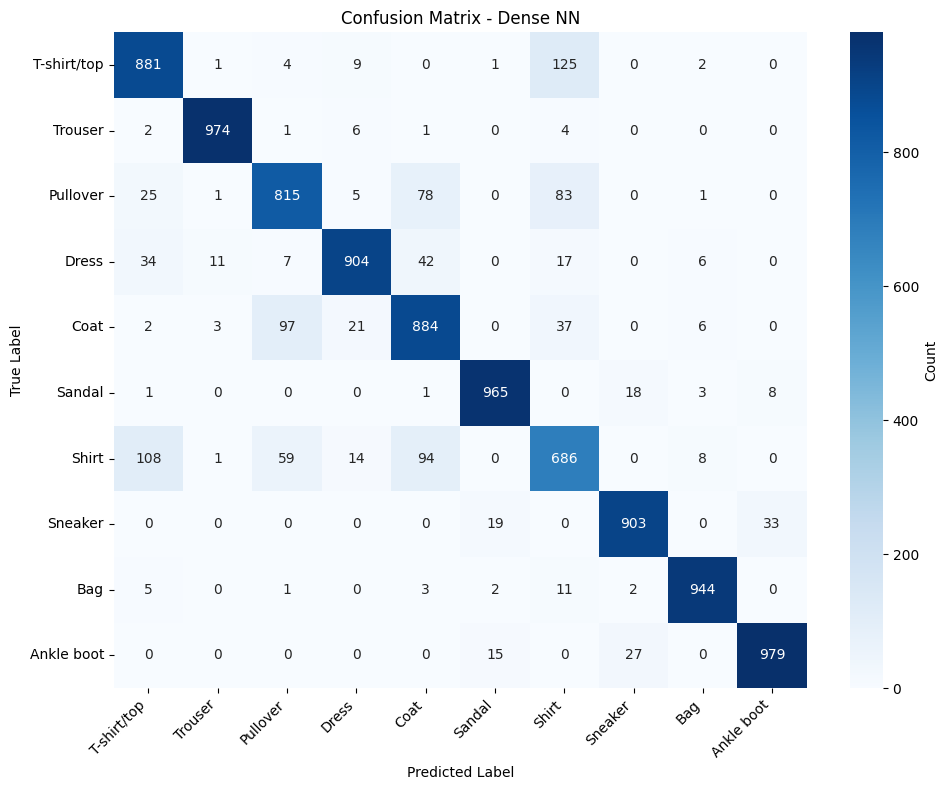


Structure: OneCNN
Optimizer: AdamW (lr=0.001)
Loss Function: Cross Entropy
Activation: ReLU
FC Structure: (512, 256)
Epochs: 15
Final Training Loss: 0.0356
Final Validation Loss: 0.3918
Training Time: 537.44 seconds
Training Accuracy: 99.2200%
Validation Accuracy: 91.7100%
Total Parameters: 2,903,626

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.87      0.87      1023
     Trouser       0.99      0.98      0.99       988
    Pullover       0.86      0.88      0.87      1008
       Dress       0.93      0.91      0.92      1021
        Coat       0.87      0.90      0.88      1050
      Sandal       0.98      0.98      0.98       996
       Shirt       0.78      0.75      0.76       970
     Sneaker       0.96      0.95      0.96       955
         Bag       0.97      0.98      0.98       968
  Ankle boot       0.97      0.97      0.97      1021

    accuracy                           0.92     10000
   macro avg       0.92

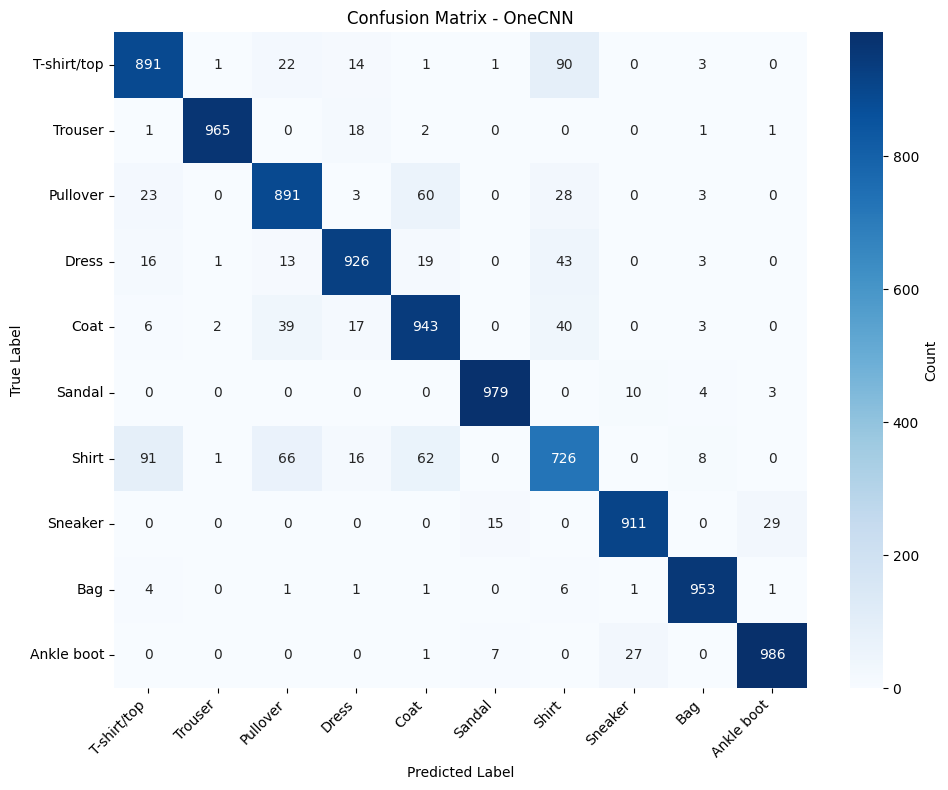


Structure: TwoCNN
Optimizer: AdamW (lr=0.001)
Loss Function: Cross Entropy
Activation: ReLU
FC Structure: (512, 256)
Epochs: 15
Final Training Loss: 0.0737
Final Validation Loss: 0.3061
Training Time: 470.54 seconds
Training Accuracy: 97.8340%
Validation Accuracy: 91.7600%
Total Parameters: 972,426

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.90      0.89      1023
     Trouser       0.98      0.99      0.98       988
    Pullover       0.87      0.85      0.86      1008
       Dress       0.91      0.94      0.93      1021
        Coat       0.87      0.87      0.87      1050
      Sandal       0.98      0.98      0.98       996
       Shirt       0.80      0.74      0.77       970
     Sneaker       0.94      0.97      0.96       955
         Bag       0.97      0.98      0.98       968
  Ankle boot       0.98      0.96      0.97      1021

    accuracy                           0.92     10000
   macro avg       0.92  

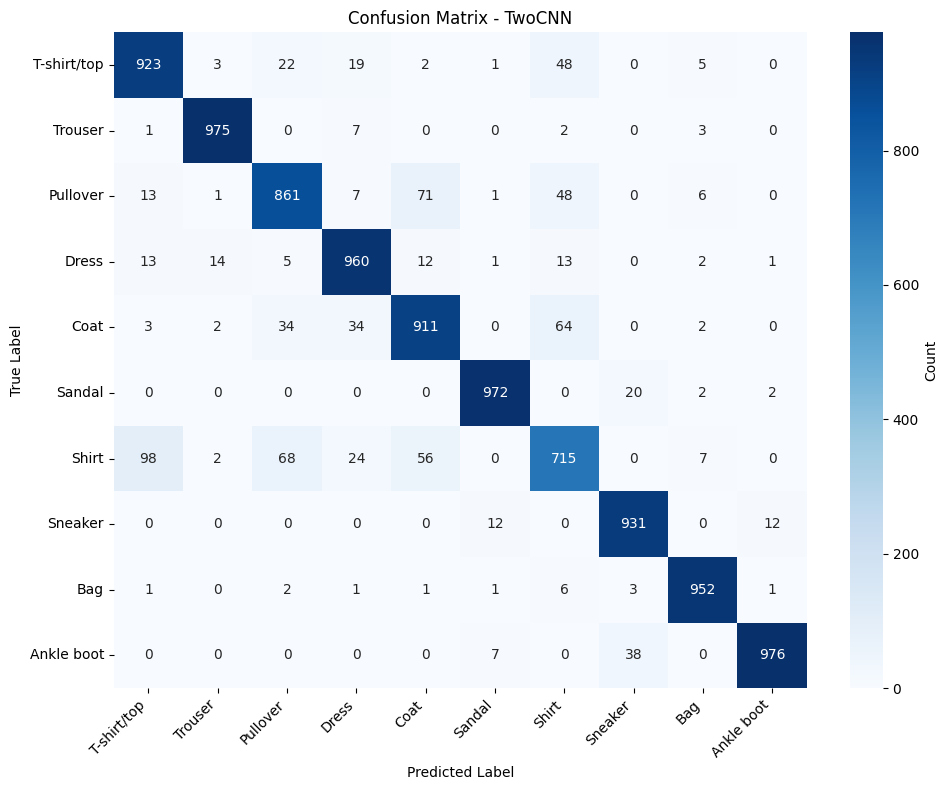


Structure: ThreeCNN
Optimizer: AdamW (lr=0.001)
Loss Function: Cross Entropy
Activation: ReLU
FC Structure: (512, 256)
Epochs: 15
Final Training Loss: 0.1524
Final Validation Loss: 0.3425
Training Time: 453.75 seconds
Training Accuracy: 95.4860%
Validation Accuracy: 89.5800%
Total Parameters: 292,618

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.84      0.86      1023
     Trouser       0.98      0.97      0.98       988
    Pullover       0.79      0.85      0.82      1008
       Dress       0.90      0.92      0.91      1021
        Coat       0.81      0.87      0.84      1050
      Sandal       0.96      0.97      0.96       996
       Shirt       0.77      0.67      0.72       970
     Sneaker       0.94      0.93      0.93       955
         Bag       0.97      0.98      0.97       968
  Ankle boot       0.95      0.96      0.96      1021

    accuracy                           0.90     10000
   macro avg       0.90

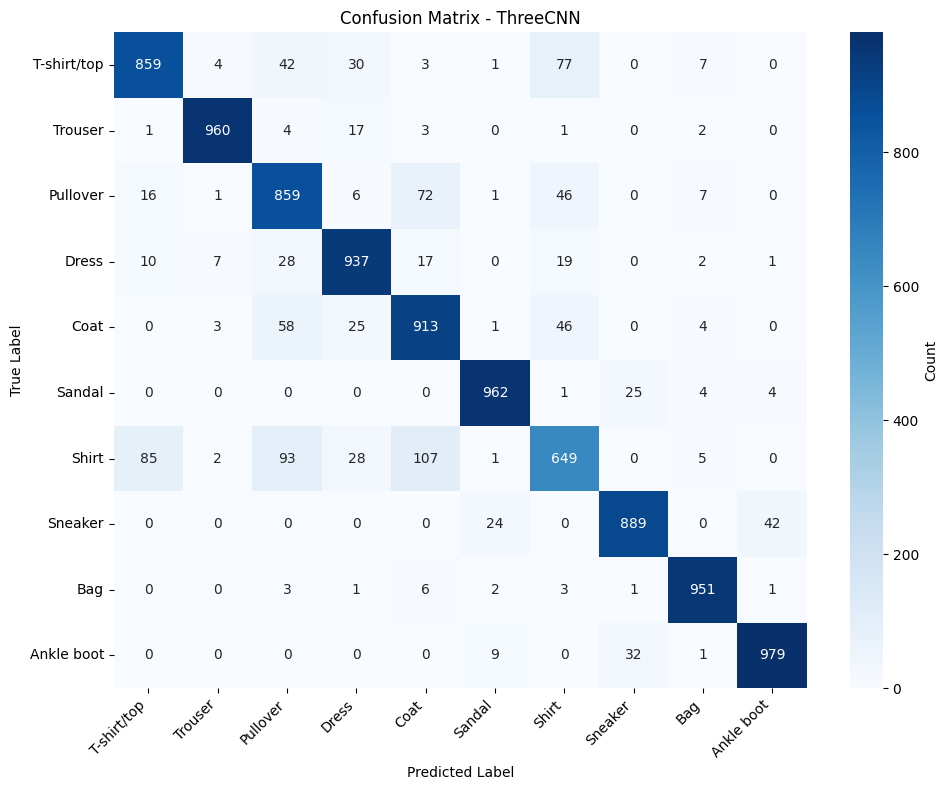



COMPARISON OF ALL STRUCTURES
Structure                 Train Loss   Val Loss     Train Acc    Val Acc      Time (s)     Params         
----------------------------------------------------------------------
Dense NN                  0.1839       0.3157       93.63        89.35        50.51        535,818        
OneCNN                    0.0356       0.3918       99.22        91.71        537.44       2,903,626      
TwoCNN                    0.0737       0.3061       97.83        91.76        470.54       972,426        
ThreeCNN                  0.1524       0.3425       95.49        89.58        453.75       292,618        

BEST PERFORMERS
Best Validation Accuracy: TwoCNN (91.76%)
Best Training Accuracy: OneCNN (99.22%)
Fastest Training: Dense NN (50.51s)
Smallest Model: ThreeCNN (292,618 params)


In [6]:
# Convolution Neural Networks with MaxPool2d layers
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import time
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

# Dense Neural Network (same as before, no conv. or pooling.. flatten input = 784 -> 512 -> 256 -> 10)
class DenseNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# OneCNN - 1 conv layer, 1 pool layer
class OneCNN(nn.Module):
    def __init__(self):                   # (input, output, kernel_size) (28x28 input start)
        super().__init__()                # 28 - 3 + 1 = 26
        self.conv1 = nn.Conv2d(1, 32, 3)  # 28 -> 26 | output size = input size - kernel size + 1
        self.pool = nn.MaxPool2d(2, 2)    # 26 -> 13 | output size / 2
        self.fc1 = nn.Linear(32 * 13 * 13, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# TwoCNN - 2 conv layers, 2 pool layers
class TwoCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)   # 28 -> 26
        self.pool = nn.MaxPool2d(2, 2)     # 26 -> 13
        self.conv2 = nn.Conv2d(32, 64, 3)  # 13 -> 11
        # pool again                        # 11 -> 5 (11/2 = 5.5 but round down)
        self.fc1 = nn.Linear(64 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# ThreeCNN - 3 conv layers, 3 pool layers
class ThreeCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)    # 28 -> 26
        self.pool = nn.MaxPool2d(2, 2)      # 26 -> 13
        self.conv2 = nn.Conv2d(32, 64, 3)   # 13 -> 11
        # pool again                         # 11 -> 5
        self.conv3 = nn.Conv2d(64, 128, 3)  # 5 -> 3
        # pool again                         # 3 -> 1 (3/2 = 1.5 but round down)
        self.fc1 = nn.Linear(128 * 1 * 1, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


structures = [
    ('Dense NN', DenseNN()),
    ('OneCNN', OneCNN()),
    ('TwoCNN', TwoCNN()),
    ('ThreeCNN', ThreeCNN()),
]

num_epochs = 15

results = []

for struct_name, net in structures:
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(net.parameters(), lr=0.001)

    # Training
    start_time = time.time()
    epoch_losses = []

    for epoch in range(num_epochs):
        net.train()
        epoch_loss = 0.0
        batch_count = 0

        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            batch_count += 1

        epoch_losses.append(epoch_loss / batch_count)

    training_time = time.time() - start_time

    # Validation - collect predictions for classification report
    net.eval()
    correct = 0
    total = 0
    val_loss = 0.0
    val_batch_count = 0

    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for data in val_loader:
            images, labels_batch = data
            outputs = net(images)
            loss = criterion(outputs, labels_batch)
            val_loss += loss.item()
            val_batch_count += 1

            _, predicted = torch.max(outputs, 1)
            total += labels_batch.size(0)
            correct += (predicted == labels_batch).sum().item()

            # Store predictions and labels for classification report
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels_batch.cpu().numpy())

    val_accuracy = 100 * correct / total
    avg_val_loss = val_loss / val_batch_count

    # Training accuracy
    train_correct = 0
    train_total = 0
    with torch.no_grad():
        for data in train_loader:
            images, labels_batch = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            train_total += labels_batch.size(0)
            train_correct += (predicted == labels_batch).sum().item()

    train_accuracy = 100 * train_correct / train_total

    total_params = sum(p.numel() for p in net.parameters())

    results.append({
        'structure': struct_name,
        'final_train_loss': epoch_losses[-1],
        'final_val_loss': avg_val_loss,
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'training_time': training_time,
        'total_params': total_params,
        'predictions': all_predictions,
        'true_labels': all_labels
    })

    print(f"Structure: {struct_name}")
    print(f"Optimizer: AdamW (lr=0.001)")
    print(f"Loss Function: Cross Entropy")
    print(f"Activation: ReLU")
    print(f"FC Structure: (512, 256)")
    print(f"Epochs: {num_epochs}")
    print(f"Final Training Loss: {epoch_losses[-1]:.4f}")
    print(f"Final Validation Loss: {avg_val_loss:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print(f"Training Accuracy: {train_accuracy:.4f}%")
    print(f"Validation Accuracy: {val_accuracy:.4f}%")
    print(f"Total Parameters: {total_params:,}")
    print()

    print("Classification Report:")
    print(classification_report(all_labels, all_predictions, target_names=classes))
    print()

    print("Confusion Matrix:")
    conf_matrix = confusion_matrix(all_labels, all_predictions)
    print(conf_matrix)
    print()

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes,
                yticklabels=classes,
                cbar_kws={'label': 'Count'})
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {struct_name}')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    print()

print("\n======================================================================")
print("COMPARISON OF ALL STRUCTURES")
print("======================================================================")
print(f"{'Structure':<25} {'Train Loss':<12} {'Val Loss':<12} {'Train Acc':<12} {'Val Acc':<12} {'Time (s)':<12} {'Params':<15}")
print("----------------------------------------------------------------------")
for r in results:
    print(f"{r['structure']:<25} {r['final_train_loss']:<12.4f} {r['final_val_loss']:<12.4f} {r['train_accuracy']:<12.2f} {r['val_accuracy']:<12.2f} {r['training_time']:<12.2f} {r['total_params']:<15,}")

best_val = max(results, key=lambda x: x['val_accuracy'])
best_train = max(results, key=lambda x: x['train_accuracy'])
fastest = min(results, key=lambda x: x['training_time'])
smallest = min(results, key=lambda x: x['total_params'])

print("\n======================================================================")
print("BEST PERFORMERS")
print("======================================================================")
print(f"Best Validation Accuracy: {best_val['structure']} ({best_val['val_accuracy']:.2f}%)")
print(f"Best Training Accuracy: {best_train['structure']} ({best_train['train_accuracy']:.2f}%)")
print(f"Fastest Training: {fastest['structure']} ({fastest['training_time']:.2f}s)")
print(f"Smallest Model: {smallest['structure']} ({smallest['total_params']:,} params)")


In [ ]:
# Final Convolution Neural Networks with MaxPool2d layers - ON TEST DATA
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import time
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

class TwoCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        # pool again
        self.fc1 = nn.Linear(64 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


class ThreeCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        # pool again
        self.conv3 = nn.Conv2d(64, 128, 3)
        # pool again
        self.fc1 = nn.Linear(128 * 1 * 1, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


structures = [
    ('TwoCNN', TwoCNN()),
    ('ThreeCNN', ThreeCNN()),
]

num_epochs = 15

results = []

for struct_name, net in structures:
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(net.parameters(), lr=0.001)

    # Training
    start_time = time.time()
    epoch_losses = []

    for epoch in range(num_epochs):
        net.train()
        epoch_loss = 0.0
        batch_count = 0

        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            batch_count += 1

        epoch_losses.append(epoch_loss / batch_count)

    training_time = time.time() - start_time

    # Test evaluation
    net.eval()
    correct = 0
    total = 0
    test_loss = 0.0
    test_batch_count = 0

    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for data in test_loader:
            images, labels_batch = data
            outputs = net(images)
            loss = criterion(outputs, labels_batch)
            test_loss += loss.item()
            test_batch_count += 1

            _, predicted = torch.max(outputs, 1)
            total += labels_batch.size(0)
            correct += (predicted == labels_batch).sum().item()

            # Store predictions and labels for classification report
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels_batch.cpu().numpy())

    test_accuracy = 100 * correct / total
    avg_test_loss = test_loss / test_batch_count

    # Training accuracy
    train_correct = 0
    train_total = 0
    with torch.no_grad():
        for data in train_loader:
            images, labels_batch = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            train_total += labels_batch.size(0)
            train_correct += (predicted == labels_batch).sum().item()

    train_accuracy = 100 * train_correct / train_total

    total_params = sum(p.numel() for p in net.parameters())

    results.append({
        'structure': struct_name,
        'final_train_loss': epoch_losses[-1],
        'final_test_loss': avg_test_loss,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'training_time': training_time,
        'total_params': total_params,
        'predictions': all_predictions,
        'true_labels': all_labels
    })

    print(f"Structure: {struct_name}")
    print(f"Optimizer: AdamW (lr=0.001)")
    print(f"Loss Function: Cross Entropy")
    print(f"Activation: ReLU")
    print(f"FC Structure: (512, 256)")
    print(f"Epochs: {num_epochs}")
    print(f"Final Training Loss: {epoch_losses[-1]:.4f}")
    print(f"Final Test Loss: {avg_test_loss:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print(f"Training Accuracy: {train_accuracy:.4f}%")
    print(f"Test Accuracy: {test_accuracy:.4f}%")
    print(f"Total Parameters: {total_params:,}")
    print()

    print("Classification Report:")
    print(classification_report(all_labels, all_predictions, target_names=classes))
    print()

    print("Confusion Matrix:")
    conf_matrix = confusion_matrix(all_labels, all_predictions)
    print(conf_matrix)
    print()

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes,
                yticklabels=classes,
                cbar_kws={'label': 'Count'})
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {struct_name}')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    print()

print("\n======================================================================")
print("COMPARISON OF MODELS ON TEST DATA")
print("======================================================================")
print(f"{'Structure':<25} {'Train Loss':<12} {'Test Loss':<12} {'Train Acc':<12} {'Test Acc':<12} {'Time (s)':<12} {'Params':<15}")
print("----------------------------------------------------------------------")
for r in results:
    print(f"{r['structure']:<25} {r['final_train_loss']:<12.4f} {r['final_test_loss']:<12.4f} {r['train_accuracy']:<12.2f} {r['test_accuracy']:<12.2f} {r['training_time']:<12.2f} {r['total_params']:<15,}")

best_test = max(results, key=lambda x: x['test_accuracy'])
best_train = max(results, key=lambda x: x['train_accuracy'])
fastest = min(results, key=lambda x: x['training_time'])
smallest = min(results, key=lambda x: x['total_params'])

print("\n======================================================================")
print("BEST PERFORMERS")
print("======================================================================")
print(f"Best Test Accuracy: {best_test['structure']} ({best_test['test_accuracy']:.2f}%)")
print(f"Best Training Accuracy: {best_train['structure']} ({best_train['train_accuracy']:.2f}%)")
print(f"Fastest Training: {fastest['structure']} ({fastest['training_time']:.2f}s)")
print(f"Smallest Model: {smallest['structure']} ({smallest['total_params']:,} params)")